This article 

## 0. Sample Data

GPA Table


## 1. Motivation

Laboratory composition analysis of natural gas always includes "Plus" fractions, typically denoted as "Hexanes+ (C6+)" or "Heptanes+ (C7+)," representing all compounds equal to or heavier than hexane or heptane. For extended chromatograph analysis, labs might report compounds up to n-Decane (C10H22) and group heavier fractions as "Decanes+ (C10+)." The use of plus fractions stems from the limitations of chromatograph devices, which detect only a predefined set of pure compounds. Given the presence of potentially more than 100 different compounds, each with less than 0.1% mole fraction, it is impractical to determine the exact mole fractions of all compounds and convenient to input them into equation-of-state (EOS) software. Hence, the plus fractions are used. However, because a plus fraction is a pseudo-compound, it has no designated values for molecular weight ($MW$), critical pressure ($P_c$) and temperature ($T_c$), density ($\rho$), viscosity ($\mu$), or acentric factor ($\omega$), which are some of the required parameters for EOS modeling. *Characterization* of the plus fraction is needed to assign such properties for EOS modling. 

In <a href="https://www.bre.com/ProMax-Upstream.aspx" target="_blank">BRE ProMax</a>, a leading process simulation software in the upstream oil and gas industry, <strong>characterizing a plus fraction requires at least the normal boiling point or a combination of both molecular weight and liquid specific (or API) gravity</strong> (<a href="#fig-2" class="internal-link">Figure 2</a>). Although the normal boiling point is preferred for characterizing plus fractions<sup><a class="internal-link" href="#id1" id="id11">[1]</a> pg.144</sup>, distillation data is seldom reported for surface facility modeling (this may be different for PVT sims for downhole reservoir simulation). Thus, for tasks such as C6+ or C7+ characterization, both molecular weight and liquid specific gravity are necessary. Unfortunately, real life lab reports don't always come with both $MW$ and liquid specific gravity data for the plus fractions. <u><strong>However, they always report gross heating values (GHV), which can be empircially correlated to calculate $MW$ and liquid density. </strong></u>

<div class="row full_screen_margin_70 mobile_responsive_plot_full_width" style="" id="fig-2">
<div class="col"><img src="jupyter_images/ghv_promax_screenshot_1.png"></div></div> 

<div class="col-12 fig-title"><p class="image-description"><strong>Figure 2:</strong> Screenshot of <a href="https://www.bre.com/ProMax-Upstream.aspx" target=_blank>BRE ProMax</a> illustrating the characterization of the Heptanes+ (C7+) fraction. The software necessitates either the normal boiling point or a combination of molecular weight and specific (or API) gravity for component characterization. Cells highlighted in blue indicate user inputs, while those in black display calculated values.</p></div>
<div><hr></div>

<a href="#fig-3" class="internal-link">Figure 3</a> below presents real-life gas sample analyses obtained from atmospheric tanks (Type 1 and 4), a high-pressure separator at 690 psig (Type 2), and a gas salesline operating at 58 psig (Type 3). Types 1 and 2 do not report liquid density, as the original samples were in a gaseous phase. Typically, gas samples report gas specific gravity, while liquid samples report liquid specific (or API) gravity. Since process simulation software requires liquid specific gravity, it can be correlated from the GHV values, discussed in more detail <a href="#" class="internal-link">below</a>. Additionally, Type 2 lacks properties of the plus fractions, which can be computed using the molecular weighted average of known compounds. Type 3 includes calculated $MW$ and liquid specific gravity, suitable for direct input for C7+ characterization, although these values are not measured but computed by making assumptions about the compositions of the plus fractions. For C7+, it's reasonable to assume a 50% mix of n-hexane (C6H14) and n-heptane (C7H16) for natural gas samples. Type 4 explicitly outlines assumptions for the composition of the plus fraction. In this scenario, explicit characterization of the plus fraction is unnecessary; users can redistribute the mole fraction of the plus fraction (1.472%) based on the ratio of assumed compounds (C6-60%, C7-30%, C8-10%).

<div class="row full_screen_margin_90 mobile_responsive_plot_full_width" style="" id="fig-3">
<div class="col"><img src="jupyter_images/gas_sample_types.png"></div></div>    
<div class="col-12 fig-title"><p class="image-description"><strong>Figure 3:</strong> Examples of gas sample analyses. <u>Type 1</u> reports gas specific gravity, as the sample was taken in a gaseous phase. Process simulation software requires liquid specific gravity, which can be calculated using empirical correlation with the GHV value. <u>Type 2</u> does not report properties of the Hexane+ fraction separately, but rather for the entire sample. The properties of the plus fraction can be derived by back-solving with the molecular-weighted average of known compounds. <u>Type 3</u> includes both molecular weight and liquid density values (highlighted in orange). However, it is important to note that laboratories providing these values typically make assumptions about the compositions of the plus fractions, such as a distribution of C6-60%, C7-30%, and C8-10%, as illustrated in <u>Type 4</u>. Although not the most accurate method for characterizing the plus fraction, it offers convenience.</p></div>

## 2. Understanding types of GHVs reported in lab analysis

There are 6 types of heating values you will see on lab reports: 1) gross heating value, 2) net heating value, 3) dry basis, 4) wet (saturated) basis, 5) ideal-gas heating value, and 6) real-gas heating value.

<div><hr></div>

<strong>Gross Heating Value:</strong> GHV includes the total amount of heat released when a fuel is burned completely and the combustion products are returned to a pre-combustion temperature, typically 60°F. Crucially, GHV accounts for the latent heat of vaporization of water produced during combustion. This means that if water vapor is produced as a combustion product, the heat required to condense it back into liquid water is included in the GHV. The water here refers to a product of a combustion reaction, such as in: $CH_4 + O_2 \rightarrow CO_2 + H_2O$. It is not the water moisture content present in the original sample before combustion.

<strong>Net Heating Value:</strong> This is GHV minus the latent heat of vaporization of water produced during combustion. This is a theoretical value because the amount of post-combustion water cannot be measured.

<strong>Dry basis:</strong> This is a measurement of the fuel's heating value after all moisture has been removed. Accuracy of most chromatograph devices for mole fraction determination of known compounds drops in the presence of water, so it's a common practice to remove any water content prior to running the sample into the chromatograph devices. This is the reason that mole fractions of the lab reports do not include water fraction. Dry basis gross heating value can be measured by a bomb calorimeter if the sample is oven dried.

<strong>Wet (saturated) basis:</strong> Wet basis gross heating value can be measured by a bomb calorimeter using the sample as is.

<strong>Ideal-gas heating value:</strong> Calculated assuming the gas follows the ideal gas law, where the gas compressibility factor (Z) is considered to be 1. This simplification is useful for theoretical calculations and scenarios where gas behaves nearly ideally, typically at standard conditions of temperature and pressure.

<strong>Real-gas heating value:</strong> This is GHV divided by a Z-factor. For practical purposes, one could always assume Z=0.99 for all lab reports since most labs operate at standard conditions.

<div><hr></div>

It should be noted that the GHV figures reported in laboratory analyses are generally computed rather than directly measured through methods such as bomb calorimetry. In most lab reports, the GHVs of identified compounds are derived from values listed in the GPA 2145-16 compound property data table<sup><a class="internal-link" href="#id2" id="id21">[2]</a></sup>. For the GHV estimation of unknown (plus) fractions, a specific composition ratio is typically presumed (ex: 60% C6, 30% C7, and 10% C8 for Hexanes+). The GPA 2145 standard uses dry-basis ideal gas gross heating value. Consequently, <u><strong>the dry-basis ideal gas gross heating value is the preferred metric for correlating GHV with molecular weight and specific gravity.</strong></u>

### 3. Impact of PNA composition and Hydrogen-Carbon Ratio on GHV

Paraffin-Naphthene-Aromatic (PNA) composition indicates the ratio of each hydrocarbon group within unrefined natural gas and crude oil compositions, crucial for correlating the GHV of the plus fractions to molecular weight and specific gravity due to varying energy-mass densities among paraffins, naphthenes, and aromatics. <a href="#fig-4" class="internal-link">Figure 4</a> showcases a strong linear correlation between GHVs and the molecular weight of hydrocarbon compounds, highlighting the difference in energy-mass density between aromatic (green) and paraffinic (blue) compounds. Paraffinic compounds exhibit higher energy-mass density than aromatics, a disparity credited to paraffins' higher hydrogen to carbon (H:C) ratio (GHV of carbon is approximately 32.8kJ/g, and hydrogen is 141.8kJ/g; hydrogen has 4.32 times more energy per mass than carbon). Paraffinic compounds equal or heavier than n-pentane (C<sub>5</sub>H<sub>12</sub>) see their H:C ratio converge from 2.4 to 2.1 as the compound gets heavier, aligning with the paraffin formula $C_nH_{2n+2}$. Conversely, aromatics typically adhere to a $C_nH_n$ formula, suggesting a 1:1 H:C ratio, which is less than half of paraffins, resulting in a lower energy density.

The impact of H:C ratio is further highlighted in <a href="#fig-5" class="internal-link">Figure 5</a>, which shows correlation between GHV and liquid specific gravity. One can observe an exponential trend in GHV for light-end paraffins (methane HC=4, ethane HC=3, propane HC=2.67, n-butane HC=2.5) in the left tail, and then exhibiting stable linear trend as the H:C ratio converges to 2.1 with increasing $n$. This leads to the conclusion: <strong><u>Natural gas or crude oil with a higher proportion of non-paraffinic composition will have reduced energy content per molar mass or specific gravity, due to lower hydrogen to carbon ratio of naphthenes and aromatics.</u></strong>. The conclusion calls for methods that can predict PNA composition, which is discussed in <a href="#3.1.-Approximation-of-PNA-composition" class="internal-link">Section 3.1.</a> 

<div class="row full_screen_margin_90 mobile_responsive_plot_full_width" style="" id="fig-4">
<div class="col"><img src="jupyter_images/ghvs_vs_mws.png"></div></div>    
<div class="col-12 fig-title"><p class="image-description"><strong>Figure 4:</strong> Scatter plot of known compounds upto n-hexadecane (C16H34) listed in the GPA 2145 table<sup><a class="internal-link" href="#id2" id="id22">[2]</a></sup>. Compounds that have "cyclo" in their compound name are identified as naphthenic. Compounds that follow chemical formula of $C_nH_{2n + 2}$ are idenfitied as paraffins. Compounds that have "toluene", "benzene", and "xylene" are identified as aromatics (styrene and napthalene are also identified as aromatics). Compounds that have $-OH$ in their chemical formula as hydroxlys. Compounds that contain $C$ and $H$ atoms in their formula are identified as other hydrocarbons.</p></div>

<div class="solution_panel closed">
    <div class="solution_title">
        <p class="solution_title_string">Source Code For Figure (4)</p>
        <ul class="nav navbar-right panel_toolbox">
            <li><a class="collapse-link"><i class="fa fa-chevron-down"></i></a></li>
        </ul>
    <div class="clearfix"></div>
    </div>
    <div class="solution_content">
        <pre>
            <code class="language-python">
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('GPA 2145-16 Compound Properties Table - English - Truncated and PNA Identified.csv')

# Labeling for displaying texts
labels = ['methane', 'propane', 'n-butane', 'n-heptane', 'n-octane', 'n-decane', 'cyclohexane', 'cyclopentane', 'ethane',
'n-dodecane','n-tetradecane','n-hexadecane', 'methanol', 'ethanol', 'naphthalene', 'isobutylcyclopentane', 'hydrogen',
 'sulfur dioxide', 'hydrogen sulfide', 'toluene', 'benzene', 'm-xylene', 'pentylbenzene', 'hexylbenzene',
         'propylene', '1-butene'
         ]
df['Display Text'] = df['Compound'].isin(labels)

BTEX_idx = df[df['Is BTEX'] == True].index
aromatic_idx = df[df['Is Aromatic'] == True].index
non_HC_idx = df[df['Is Hydrocarbon'] == False].index
hydroxyl_idx = df[df['Is Hydroxyl'] == True].index
paraffinic_idx = df[df['Is Paraffinic'] == True].index
naphethenic_idx = df[df['Is Naphthenic'] == True].index
other_idx = df[df['Others'] == True].index
whole_idx = list(df.index)

x = df['Molar Mass [g/mol]']
y = df['Gross Heating Value Ideal Gas [Btu/ft^3]']

##################################### Plotting #######################################

fig, ax = plt.subplots(figsize=(8, 4.5))

alpha = 1
_1 = ax.scatter(x.loc[paraffinic_idx], y.loc[paraffinic_idx], s=50, edgecolor='k', alpha=alpha, label='Paraffinic')
_2 = ax.scatter(x.loc[naphethenic_idx], y.loc[naphethenic_idx], s=50, edgecolor='k', alpha=alpha, label='Naphthenic')
_3 = ax.scatter(x.loc[aromatic_idx], y.loc[aromatic_idx], s=50, edgecolor='k', alpha=alpha, label='Aromatic/BTEX')
_4 = ax.scatter(x.loc[hydroxyl_idx], y.loc[hydroxyl_idx], s=50, edgecolor='k', alpha=alpha, label='Hydroxylic')
_5 = ax.scatter(x.loc[non_HC_idx], y.loc[non_HC_idx], s=50, edgecolor='k', alpha=alpha, label='Non-HCs')
_6 = ax.scatter(x.loc[other_idx], y.loc[other_idx], s=50, edgecolor='k', alpha=alpha, label='Other-HCs')

c1 = _1.get_facecolor()[0]
c2 = _2.get_facecolor()[0]
c3 = _3.get_facecolor()[0]
c4 = _4.get_facecolor()[0]
c5 = _5.get_facecolor()[0]
c6 = _6.get_facecolor()[0]

ax.legend(fontsize=9, ncol=3)

texts = df['Compound']
for i, txt in enumerate(texts):
    if df['Display Text'].loc[i]:
        c = c5
        ha ='left'
        va = 'top'
        
        if df['Is Paraffinic'].loc[i]: 
            c = c1
            ha ='right'
            va = 'bottom'
        if df['Is Naphthenic'].loc[i]:
            c = c2
            ha ='right'
            va = 'bottom'
        if df['Is Aromatic'].loc[i]:
            c = c3
            va = 'top'
            ha = 'left'
        if df['Is Hydroxyl'].loc[i]:
            c = c4
            va = 'bottom'
            ha = 'left'
        if df['Others'].loc[i]:
            c = c6
            va = 'top'
            ha = 'left'
        
        if ha == 'left':
            icr = 3
        else:
            icr= -3
        
        ax.annotate(txt, (x.loc[i] + icr, y.iloc[i]), fontsize=10, c=c, ha=ha, va=va)

ax.minorticks_on()
ax.grid(axis='y', which='major', linestyle='--', color='grey', alpha=0.5)
#ax.grid(axis='y', which='minor', linestyle='--', color='grey', alpha=0.2)
#ax.grid(axis='x', which='minor', color='grey', linestyle='--', alpha=0.2)
ax.grid(axis='x', which='major', color='grey', linestyle='--', alpha=0.5)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_xlabel('Molecular Weight [g/mol]', fontsize=11)
ax.set_ylabel('Gross Heating Value [Btu/scf]', fontsize=11)
ax.text(0.99, 0.1, 'aegis4048.github.io', fontsize=12, ha='right', va='center',
    transform=ax.transAxes, color='grey', alpha=0.5)

#ax.set_xlim(0, 1)
#ax.set_ylim(10000, 30000)

def setbold(txt):
    return ' '.join([r"$\bf{" + item + "}$" for item in txt.split(' ')])

bold_txt = setbold('Gross Heating Value vs. Molecular Weight')
plain_txt = r', For different compound groups'
fig.suptitle(bold_txt + plain_txt, verticalalignment='top', x=0, horizontalalignment='left', fontsize=12, y=0.96)
yloc = 0.88
ax.annotate('', xy=(0.01, yloc + 0.01), xycoords='figure fraction', xytext=(1.02, yloc + 0.01),
            arrowprops=dict(arrowstyle="-", color='k', lw=0.7))

ax.annotate('Data source: GPA 2145-16', xy=(-0.11, -.12), xycoords='axes fraction', fontsize=9)

fig.tight_layout()
            </code>
        </pre>
    </div>
</div>

<div class="row full_screen_margin_90 mobile_responsive_plot_full_width" style="" id="fig-5">
<div class="col"><img src="jupyter_images/ghv_vs_sg_liq.png"></div></div>    
<div class="col-12 fig-title"><p class="image-description"><strong>Figure 5:</strong> Same data set as <a class="internal-link" href="#fig-4">Figure 4</a>, but truncated to focus on the PNA groups more clearly. The conversion of gas GHV from Btu/scf to liquid GHV in Btu/lbm is performed using <a class="internal-link" href="#eq-3">Eq-4</a>. As the number of carbon atoms increases, the H:C ratio of paraffins converges towards 2.1, consistent with the paraffin chemical formula $C_nH_{2n + 2}$. In the left tail of the graph, light-end paraffins display an exponential trend, which transitions to a linear trend as the HC ratio stabilizes at 2.1. This shift implies that the linear prediction model for SG<sub>liq</sub> based on GHV values will remain valid beyond the range of the sample data observed (>C10).</p></div>

<div class="solution_panel closed">
    <div class="solution_title">
        <p class="solution_title_string">Source Code For Figure (5)</p>
        <ul class="nav navbar-right panel_toolbox">
            <li><a class="collapse-link"><i class="fa fa-chevron-down"></i></a></li>
        </ul>
    <div class="clearfix"></div>
    </div>
    <div class="solution_content">
        <pre>
            <code class="language-python">
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('GPA 2145-16 Compound Properties Table - English - Truncated and PNA Identified.csv')

BTEX_idx = df[df['Is BTEX'] == True].index
aromatic_idx = df[df['Is Aromatic'] == True].index
non_HC_idx = df[df['Is Hydrocarbon'] == False].index
hydroxyl_idx = df[df['Is Hydroxyl'] == True].index
paraffinic_idx = df[df['Is Paraffinic'] == True].index
naphethenic_idx = df[df['Is Naphthenic'] == True].index
other_idx = df[df['Others'] == True].index
whole_idx = list(df.index)

x = df['Liq. Relative Density @60F:1atm']
y = df['Gross Heating Value Ideal Gas [Btu/lbm]']

labels = ['methane', 'propane', 'n-butane', 'n-heptane', 'n-decane', 'cyclopentane', 'ethane',
          'n-pentane', '1,3-butadiene', 'n-pentadecane',
'methanol', 'ethanol', 'naphthalene', 'hydrogen',
 'sulfur dioxide', 'hydrogen sulfide', 'toluene', 'benzene', 'pentylbenzene', 'butylbenzene', 'ethylbenzene','styrene',
         'propylene', '1-butene', 'propylcyclohexane', 'cyclodecane',
         ]
df['Display Text'] = df['Compound'].isin(labels)

fig, ax = plt.subplots(figsize=(8, 4.5))

alpha = 1
_1 = ax.scatter(x.loc[paraffinic_idx], y.loc[paraffinic_idx], s=50, edgecolor='k', alpha=alpha, label='Paraffinic')
_2 = ax.scatter(x.loc[naphethenic_idx], y.loc[naphethenic_idx], s=50, edgecolor='k', alpha=alpha, label='Naphthenic')
_3 = ax.scatter(x.loc[aromatic_idx], y.loc[aromatic_idx], s=50, edgecolor='k', alpha=alpha, label='Aromatic/BTEX')
_4 = ax.scatter(x.loc[hydroxyl_idx], y.loc[hydroxyl_idx], s=50, edgecolor='k', alpha=alpha)
_5 = ax.scatter(x.loc[non_HC_idx], y.loc[non_HC_idx], s=50, edgecolor='k', alpha=alpha)
_6 = ax.scatter(x.loc[other_idx], y.loc[other_idx], s=50, edgecolor='k', alpha=alpha, label='Other-HCs')

c1 = _1.get_facecolor()[0]
c2 = _2.get_facecolor()[0]
c3 = _3.get_facecolor()[0]
c4 = _4.get_facecolor()[0]
c5 = _5.get_facecolor()[0]
c6 = _6.get_facecolor()[0]

ax.legend(fontsize=9, ncol=4)

texts = df['Compound']
for i, txt in enumerate(texts):
    if df['Display Text'].loc[i]:
        c = c5
        ha ='left'
        va = 'top'

        if df['Is Paraffinic'].loc[i]:
            c = c1
            ha ='left'
            va = 'bottom'
        if df['Is Naphthenic'].loc[i]:
            c = c2
            ha ='right'
            va = 'top'
        if df['Is Aromatic'].loc[i]:
            c = c3
            va = 'top'
            ha = 'left'
        if df['Is Hydroxyl'].loc[i]:
            c = c4
            va = 'bottom'
            ha = 'left'
        if df['Others'].loc[i]:
            c = c6
            va = 'top'
            ha = 'right'
        
        if txt in ['cyclodecane', 'methylcyclooctane',]:
            ha ='left'
            va = 'bottom'           
        if txt in ['pentylbenzene', 'butylbenzene', 'ethylbenzene']:
            ha = 'right'
            
        if txt in ['styrene',]:
            va = 'bottom'

        if ha == 'left':
            icr = 0.007
        else:
            icr= -0.007

        ax.annotate(txt, (x.loc[i] + icr, y.iloc[i]), fontsize=10, c=c, ha=ha, va=va)

ax.minorticks_on()
ax.grid(axis='y', which='major', linestyle='--', color='grey', alpha=0.5)
ax.grid(axis='x', which='major', color='grey', linestyle='--', alpha=0.5)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_ylabel('Gross Heating Value [Btu/lbm]', fontsize=11)
ax.set_xlabel('Liquid Specific Gravity', fontsize=11)
ax.text(0.03, 0.08, 'aegis4048.github.io', fontsize=12, ha='left', va='center',
    transform=ax.transAxes, color='grey', alpha=0.5)

ax.set_ylim(17800, 24500)
ax.set_xlim(0.29, 1.02)

def setbold(txt):
    return ' '.join([r"$\bf{" + item + "}$" for item in txt.split(' ')])

bold_txt = setbold('Gross Heating Value vs. Liquid Specific Gravity')
plain_txt = r', For different compound groups'
fig.suptitle(bold_txt + plain_txt, verticalalignment='top', x=0, horizontalalignment='left', fontsize=12, y=0.96)
yloc = 0.88
ax.annotate('', xy=(0.01, yloc + 0.01), xycoords='figure fraction', xytext=(1.02, yloc + 0.01),
            arrowprops=dict(arrowstyle="-", color='k', lw=0.7))

ax.annotate('Data source: GPA 2145-16', xy=(-0.11, -.12), xycoords='axes fraction', fontsize=9)
        
fig.tight_layout()

fig.savefig('ghv_vs_sg_liq.png', dpi=300, bbox_inches='tight')
            </code>
        </pre>
    </div>
</div>

<div class="alert alert-info" id="what_is_PNA">
    <h4>Notes: What are paraffins, naphthenes, and aromatics?</h4>
    <p>Paraffins, naphtehens, and aromatics are the primary hydrocarbon groups 
        that make up compositions of the naturally occuring crude oil and gas. The below is a brief on each of them: </p>    
    <p><strong>Paraffins:</strong> Known as alkanes, paraffins follow the general formula $C_nH_{2n+2}$. This group is characterized by its high hydrogen to carbon ratio, contributing to their higher energy density per mass compared to other hydrocarbon types. Examples include Methane (CH₄), Ethane (C₂H₆), Propane (C₃H₈), Butane (C₄H₁₀), Pentane (C₅H₁₂), Hexane (C₆H₁₄), Heptane (C₇H₁₆), Octane (C₈H₁₈), Nonane (C₉H₂₀), and Decane (C₁₀H₂₂).</p>
    <p><strong>Naphthenes:</strong> Also known as cycloalkanes, naphthenes are very similar to paraffins and follow the general chemical formula $C_nH_{2n}$. Compounds typically containing "cyclo" in their names are considered naphthenic. Examples are Cyclopropane (C₃H₆), Cyclobutane (C₄H₈), Cyclopentane (C₅H₁₀), Cyclohexane (C₆H₁₂), Cycloheptane (C₇H₁₄), Cyclooctane (C₈H₁₆), Cyclononane (C₉H₁₈), Cyclodecane (C₁₀H₂₀), Methylcyclopentane (C₆H₁₂), and Ethylcyclohexane (C₈H₁₆).</p>
    <p><strong>Aromatics:</strong> This class of hydrocarbons is characterized by one or more benzene rings in their molecular structure. The simplest aromatic compound, benzene, has the chemical formula $C_6H_6$. Aromatic compounds generally follow the formula $C_nH_n$ for monocyclic aromatics, but the presence of multiple rings and substituents can alter this formula. The carbon to hydrogen ratio for aromatics is generally 1:1, less than half of paraffins, explaining aromatics' lower energy density per mass. BTEX compounds fall within this class. Examples include Benzene (C₆H₆), Toluene (C₇H₈), Ethylbenzene (C₈H₁₀), o-Xylene (C₈H₁₀), m-Xylene (C₈H₁₀), p-Xylene (C₈H₁₀), Styrene (C₈H₈), Naphthalene (C₁₀H₈), Phenol (C₆H₅OH), and Aniline (C₆H₅NH₂).</p>
</div>

### 3.2. Approximation of PNA composition with Single-Carbon-Number groups

PNA composition can be effectively estimated with Single-Carbon-Number (SCN) groups, representing the <i>average</i> characteristics of fractions heavier than  C<sub>6</sub> or C<sub>7</sub> under conditions where detailed information is unavailable. SCN groups can be thought of as representing the <i>average</i> characteristics of all compounds that are equal to or heavier than C<sub>6</sub> or C<sub>7</sub>. For example, a C6+ fraction with an MW of 98 and an SG<sub>liq</sub> of 0.67 aligns with SCN=7, similar to n-heptane's (C<sub>7</sub>H<sub>16</sub>) MW of 100.21 and SG<sub>liq</sub> of 0.68, indicating comparable physical properties. <a href="#table-1" class="internal-link">Table 1</a> lists recommended physical properties and PNA compositions for SCN groups, with SCNs between 6 to 9 being suitable for most surface natural gas samples, corresponding to an aromatic composition range of 7% to 23.2% for C6+ fractions.

However, determining the most accurate SCN group for a sample’s plus fraction can be difficult when lab analyses exclude plus-fraction properties, often only reporting the GHV, SG, and MW of the whole sample. A practical approach involves estimating based on the gas's source: lean gas from high-pressure vesels (ex: primary HP separators) or treated gas saleslines can use SCNs of 6 or 7 (0.070 < x<sub>a</sub> < 0.145), whereas gas from lower pressure settings (ex: low pressure heater treaters, VRTs, or atmospheric tanks) likely indicates a richer vapor, pointing to SCNs of 7 or 8 (0.145 < x<sub>a</sub> < 0.192). The basis for such suggestions stems from the observation that heavier-ends (C6+) typically condense into a liquid phase within separator vessels and do not exit through the gas outlet, with most surface natural gas applications containing less than 0.3% mole fraction of compounds equal or heavier than n-Nonane (C<sub>9</sub>H<sub>20</sub>). Additionally, heavier compounds tend to vaporize more under lower pressures (and higher temperatures), justifying the recommendation for higher SCNs of 7 or 8 in near-atmospheric conditions. 

<div class="row full_screen_margin_90 mobile_responsive_plot_full_width" id="table-1">
<div class="col"><img src="jupyter_images/SCN_table.png" style="margin-bottom: 10px;"></div></div>    
<div class="col-12 fig-title"><p class="image-description"><strong>Table 1:</strong> Recommended values for T<sub>b</sub>, sg<sub>liq</sub>, MW, and PNA compositions for SCN groups<sup><a class="internal-link" href="#id3" id="id31">[3]</a></sup></p></div>

<div><hr></div>

<div id="scn-recommendation"></div>

The below is my recommendation for the choice SCN groups for surface facility natural gas applications. Note that this is based on my personal experience, and not based on proved scientific research. 

<u><strong>C6+</strong></u>

1. High pressure separators P > 100 psig: SCN=6 
2. All lean salesline gas samples: SCN=6
3. Heater treater operating under T < 110F: SCN=6
4. Heater treater opearting above T > 110F: SCN=7
5. Atmospheric tank vapor: SCN=7 or 8, depending on the sample's richness

<u><strong>C7+</strong></u>

1. High pressure separators P > 100 psig: SCN=7 
2. All lean salesline gas samples: SCN=7
3. Heater treater operating under T < 110F: SCN=7
4. Heater treater opearting above T > 110F: SCN=8
5. Atmospheric tank vapor: SCN=7 or 8, depending on the sample's richness

<u><strong>C10+</strong></u>

1. SCN=10 for all applications. In fact, you don't even need make GHV vs. SG<sub>liq</sub> or MW correlations, you could just directly take the SG<sub>liq</sub> and MW values from <a href="#table-1" class="internal-link">Table 1</a> for C10+ characterizations, or simply replace C10+ with n-decane (C<sub>10</sub>H<sub>22</sub>).

<div><hr></div>

#### 3.3 Linear prediction of MW from GHV with PNA composition

<a href="#fig-6" class="internal-link">Figure 6</a> presents linear regression models for paraffins and aromatics (<u>excluded naphthenes due to their near-identical energy densities to paraffins</u>), showing identical slopes but differing intercepts. The higher intercept for aromatics suggests a larger molar mass for the same GHV compared to paraffins. The Hexanes+ properties in <a href="#fig-7" class="internal-link">Figure 7</a> help verify the models' accuracy. Assuming a purely paraffinic composition, the model estimates the molecular weight (MW) as MW = 0.0188 x (4849 Btu/scf) - 2.758 = 88.4 g/mol, given the Hexanes+ GHV of 4849 Btu/scf. Under the unrealistic assumption of a 100% aromatic composition, the prediction adjusts to MW = 0.0186 x (4849 Btu/scf) + 10.326 = 100.5 g/mol. Thus, the actual molecular weight is determined to lie within these prediction ranges: 88.4 < MW < 100.5 g/mol. 

Accurate prediction of molecular weight from GHV requires a fraction value of aromatics. According to the recommendation of choice of SCN listed <a href="#scn-recommendation" class="internal-link">above</a>, SCN value of 7 is the most appropriate for this particular sample (C6+ characterization, atmospheric tank vapor, with relatively medium-rich vapor of 1320 Btu/scf). <a href="#table-1" class="internal-link">Table 1</a> suggests aromatic fraction x<sub>a</sub>=0.145 for SCN=7. Finally, weighted-average value of the intercepts of the aromatic and paraffinic models can be used: MW = [(1-0.145) x 0.0188 + 0.145 x 0.0186] x (4849 Btu/scf) + [(1-0.145) x (-2.758) + 0.145 x 10.326] = 90.15976 g/mol. **This value matches almost exactly with the lab reported Hexanes+ MW of 90.161 g/mol.**

<div class="row full_screen_margin_100 mobile_responsive_plot_full_width" style="" id="fig-6">
<div class="col"><img src="jupyter_images/mws_vs_ghv_pna.png"></div></div>    
<div class="col-12 fig-title"><p class="image-description"><strong>Figure 6:</strong> Linear regression on molecular weight vs. GHV for paraffins (left) and aromatics (right). They both have the near-identical slopes, but the linear model for aromatics has a bigger intercept, which translates to a bigger molar mass for the same GHV value compared to that of paraffins. </p></div>

<div class="solution_panel closed">
    <div class="solution_title">
        <p class="solution_title_string">Source Code For Figure (6)</p>
        <ul class="nav navbar-right panel_toolbox">
            <li><a class="collapse-link"><i class="fa fa-chevron-down"></i></a></li>
        </ul>
    <div class="clearfix"></div>
    </div>
    <div class="solution_content">
        <pre>
            <code class="language-python">
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

df = pd.read_csv('GPA 2145-16 Compound Properties Table - English - Truncated and PNA Identified.csv')

# Labeling for displaying texts
labels = ['methane', 'propane', 'n-butane', 'n-heptane', 'n-octane', 'n-decane', 'cyclohexane', 'cyclopentane', 'ethane',
'n-dodecane','n-tetradecane','n-hexadecane', 'methanol', 'ethanol', 'naphthalene', 'isobutylcyclopentane', 'hydrogen',
 'sulfur dioxide', 'hydrogen sulfide', 'toluene', 'benzene', 'm-xylene', 'pentylbenzene', 'hexylbenzene',
         'propylene', '1-butene'
         ]
df['Display Text'] = df['Compound'].isin(labels)

BTEX_idx = df[df['Is BTEX'] == True].index
aromatic_idx = df[df['Is Aromatic'] == True].index
non_HC_idx = df[df['Is Hydrocarbon'] == False].index
hydroxyl_idx = df[df['Is Hydroxyl'] == True].index
paraffinic_idx = df[df['Is Paraffinic'] == True].index
naphethenic_idx = df[df['Is Naphthenic'] == True].index
other_idx = df[df['Others'] == True].index
whole_idx = list(df.index)

y = df['Molar Mass [g/mol]']
x = df['Gross Heating Value Ideal Gas [Btu/ft^3]']


y1 = df[df['Is Paraffinic'] == True]['Molar Mass [g/mol]'].values
x1 = df[df['Is Paraffinic'] == True]['Gross Heating Value Ideal Gas [Btu/ft^3]'].values
combined = np.array(sorted(zip(y1.flatten(), x1), key=lambda pair: pair[1]))
y1 = combined[:, 0]
x1 = combined[:, 1].reshape(-1, 1)

ols_1 = LinearRegression().fit(x1, y1)
y_pred_1 = ols_1.predict(x1)
coefs_1 = ols_1.coef_
intercept_1 = ols_1.intercept_


y2 = df[df['Is Aromatic'] == True]['Molar Mass [g/mol]'].values
x2 = df[df['Is Aromatic'] == True]['Gross Heating Value Ideal Gas [Btu/ft^3]'].values
combined = np.array(sorted(zip(y2.flatten(), x2), key=lambda pair: pair[1]))
y2 = combined[:, 0]
x2 = combined[:, 1].reshape(-1, 1)

ols_2 = LinearRegression().fit(x2, y2)
y_pred_2 = ols_2.predict(x2)
coefs_2 = ols_2.coef_
intercept_2 = ols_2.intercept_


fig, axes = plt.subplots(1, 2, figsize=(11, 5))

axes[0].axline(xy1=(0, intercept_1), slope=coefs_1[0], linestyle='--', alpha=1, c='#1f77b4')
axes[1].axline(xy1=(0, intercept_2), slope=coefs_2[0], linestyle='--', alpha=1, c='#2ca02c')


axes[0].text(0, 205, '$MW = %.4f GHV %.3f$' % (coefs_1[0], intercept_1), fontsize=14, ha='left', va='center', color='#1f77b4')
axes[1].text(0, 205, '$MW = %.4f GHV + %.3f$' % (coefs_2[0], intercept_2), fontsize=14, ha='left', va='center', color='#2ca02c')


alpha = 0.15
_1 = axes[0].scatter(x.loc[paraffinic_idx], y.loc[paraffinic_idx], s=50, edgecolor='k', alpha=1, label='Paraffinic')
_2 = axes[0].scatter(x.loc[naphethenic_idx], y.loc[naphethenic_idx], s=50, edgecolor='k', alpha=alpha)
_3 = axes[0].scatter(x.loc[aromatic_idx], y.loc[aromatic_idx], s=50, edgecolor='k', alpha=0.05)
_4 = axes[0].scatter(x.loc[hydroxyl_idx], y.loc[hydroxyl_idx], s=50, edgecolor='k', alpha=alpha)
_5 = axes[0].scatter(x.loc[non_HC_idx], y.loc[non_HC_idx], s=50, edgecolor='k', alpha=alpha)
_6 = axes[0].scatter(x.loc[other_idx], y.loc[other_idx], s=50, edgecolor='k', alpha=alpha)

alpha = 0.15
_1 = axes[1].scatter(x.loc[paraffinic_idx], y.loc[paraffinic_idx], s=50, edgecolor='k', alpha=0.05)
_2 = axes[1].scatter(x.loc[naphethenic_idx], y.loc[naphethenic_idx], s=50, edgecolor='k', alpha=0.05)
_3 = axes[1].scatter(x.loc[aromatic_idx], y.loc[aromatic_idx], s=50, edgecolor='k', alpha=1, label='Aromatic/BTEX')
_4 = axes[1].scatter(x.loc[hydroxyl_idx], y.loc[hydroxyl_idx], s=50, edgecolor='k', alpha=alpha)
_5 = axes[1].scatter(x.loc[non_HC_idx], y.loc[non_HC_idx], s=50, edgecolor='k', alpha=alpha)
_6 = axes[1].scatter(x.loc[other_idx], y.loc[other_idx], s=50, edgecolor='k', alpha=alpha)


for ax in axes:
    ax.minorticks_on()
    ax.grid(axis='y', which='major', linestyle='--', color='grey', alpha=0.5)
    #ax.grid(axis='y', which='minor', linestyle='--', color='grey', alpha=0.2)
    #ax.grid(axis='x', which='minor', color='grey', linestyle='--', alpha=0.2)
    ax.grid(axis='x', which='major', color='grey', linestyle='--', alpha=0.5)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    ax.set_ylabel('Molecular Weight [g/mol]', fontsize=11)
    ax.set_xlabel('Gross Heating Value [Btu/scf]', fontsize=11)
    ax.text(0.99, 0.15, 'aegis4048.github.io', fontsize=10, ha='right', va='center',
        transform=ax.transAxes, color='grey', alpha=0.5)
    ax.legend(loc='lower right', fontsize=12)
    
def setbold(txt):
    return ' '.join([r"$\bf{" + item + "}$" for item in txt.split(' ')])

bold_txt = setbold('Molecular Weight and GHV correlation, ')
plain_txt = r'comparison for paraffins vs. aromatics'
fig.suptitle(bold_txt + plain_txt, verticalalignment='top', x=0.0, horizontalalignment='left', fontsize=13, y=0.965)
yloc = 0.885
ax.annotate('', xy=(0.01, yloc + 0.01), xycoords='figure fraction', xytext=(1.01, yloc + 0.01),
            arrowprops=dict(arrowstyle="-", color='k', lw=0.7))

axes[0].annotate('Data source: GPA 2145-16', xy=(-.13, -.16), xycoords='axes fraction', fontsize=9)

fig.tight_layout()
            </code>
        </pre>
    </div>
</div>

<div class="row full_screen_margin_70 mobile_responsive_plot_full_width" style="" id="fig-7">
<div class="col"><img src="jupyter_images/mw_btu_validation.png" style="margin-bottom: 10px;"></div></div>    
<div class="col-12 fig-title"><p class="image-description"><strong>Figure 7:</strong> Partial screenshot of a gas sample analysis shown in Type 3 of <a href="#fig-3" class="internal-link">Figure 3</a>. Note that this particular lab report computed the properties of the Hexanes Plus by making certain assumptions about the composition of the plus fraction. Generally, it's a common practice to assume 60% C6, 30% C7, and 10% C8 for C6+ fractions, but the exact assumptions made for this particular sample analysis are unknown. This sample originated from an atmospheric tank for vapor recovery applications.</p></div>

## 4. Correlations

This section summarizes useful correlation models to derive MW and SG<sub>liq</sub> values of plus fractions from gas GHV values. 

### 4.1. Gas GHV to MW

As demonstrated in <a href="#3.3-Linear-prediction-of-MW-from-GHV-with-PNA-composition" class="internal-link">Section 3.3</a>, MW can be predicted from gas GHV. <a href="#eq-1" class="internal-link">Eq-1</a> shows a linear regression formula with slope $m$ and intercept $b$, of which  their values for different SCN group can be found in <a href="#table-2" class="internal-link">Table 2</a>.

<div id="eq-1" style="font-size: 1rem;">
$$ MW =   m \cdot GHV - b \tag{1}$$
</div>

<div class="eq-terms">
    <div class="row eq-terms-where">where</div>
    <div class="row">
        <div class="col-2">$MW$</div>
        <div class="col-1 max-width-3">:</div>
        <div class="col-9">molecular weight [g/mol or lb/lb-mol].</div>
    </div>
    <div class="row">
        <div class="col-2">$GHV$</div>
        <div class="col-1 max-width-3">:</div>
        <div class="col-9">ideal gas gross heating value @60F-1atm [Btu/scf].</div>
    </div>   
    <div class="row">
        <div class="col-2">$m$</div>
        <div class="col-1 max-width-3">:</div>
        <div class="col-9">slope, refer to <a href="#table-2" class="internal-link">Table 2</a> for recommended values.</div>
    </div>   
    <div class="row">
        <div class="col-2">$b$</div>
        <div class="col-1 max-width-3">:</div>
        <div class="col-9">intercept, refer to <a href="#table-2" class="internal-link">Table 2</a> for recommended values.</div>
    </div>   
</div>

<div class="row full_screen_margin_100 mobile_responsive_plot_full_width" id="table-2">
<div class="col"><img src="jupyter_images/ghv_linear_scns_slopes.png" style="margin-bottom: 10px;"></div></div>    
<div class="col-12 fig-title"><p class="image-description"><strong>Table 2:</strong> Recommended slope and intercept values for <a href="#eq-1" class="internal-link">Eq-1</a>. Their values for each SCN group are computed by the aromatic fraction weighted average of the slope and intercept values of pure paraffin and pure aromatic linear regression models shown in <a href="#fig-6" class="internal-link">Figure 6</a>. The aromatic fraction values for each SCN group are based on <a href="#table-1" class="internal-link">Table 1</a>. The presence of naphthenic fractions aren't considered as they show near-identical energy density to paraffins, as explain in <a href="#3.-Impact-of-PNA-composition-and-Hydrogen-Carbon-Ratio-on-GHV" class="internal-link">Section 3</a>. Note that the recommended choice of SCN for plus fractions is based on my personal experience, and not based on scientific research (I found my method to be working quite well though).</p></div>

### 4.2. MW to SG<sub>gas</sub>

<a href="#eq-2" class="internal-link">Eq-2</a> is applicable for all gas at ideal conditions @60F-1atm. Most gas specific gravities reported in lab analysis assume 60F-1atm.

<div id="eq-3" style="font-size: 1rem;">
$$ SG_{gas} = MW / SG_{air}  \tag{2}$$
</div>

<div class="eq-terms">
    <div class="row eq-terms-where">where</div>
    <div class="row">
        <div class="col-2">$SG_{gas}$</div>
        <div class="col-1 max-width-3">:</div>
        <div class="col-9">specific gravity of gas @60F-1atm [dimensionless]</div>
    </div>        
    <div class="row">
        <div class="col-2">$MW$</div>
        <div class="col-1 max-width-3">:</div>
        <div class="col-9">molecular weight [g/mol or lb/lb-mol].</div>
    </div>
    <div class="row">
        <div class="col-2">$SG_{air}$</div>
        <div class="col-1 max-width-3">:</div>
        <div class="col-9">specific gravity of air @60F-1atm [dimensionless], assumed to be 28.97. </div>
    </div>        
</div>

### 4.3. Gas GHV to liquid GHV

Gas GHV (Btu/scf) needs to be converted into liquid GHV (Btu/lb) to predict SG<sub>liq</sub>. The unit conversion can be done with <a href="#eq-3" class="internal-link">Eq-3</a>.

<div id="eq-3" style="font-size: 1rem;">
$$ GHV_{\text{liq}} = \frac{GHV_{\text{gas}} \cdot V_{\text{ideal_gas}}}{MW}  \tag{3}$$
</div>

<div class="eq-terms">
    <div class="row eq-terms-where">where</div>
    <div class="row">
        <div class="col-2">$GHV_{liq}$</div>
        <div class="col-1 max-width-3">:</div>
        <div class="col-9">ideal gas liquid gross heating value @60F-1atm [Btu/lb].</div>
    </div>        
    <div class="row">
        <div class="col-2">$GHV$</div>
        <div class="col-1 max-width-3">:</div>
        <div class="col-9">ideal gas gross heating value @60F-1atm [Btu/scf].</div>
    </div>        
    <div class="row">
        <div class="col-2">$V_{\text{ideal_gas}}$</div>
        <div class="col-1 max-width-3">:</div>
        <div class="col-9">ideal gas molar volume @60F-1atm [scf/lb-mol], assumed to be 379.48 for all gas.</div>
    </div>
    <div class="row">
        <div class="col-2">$MW$</div>
        <div class="col-1 max-width-3">:</div>
        <div class="col-9">molecular weight [lb/lb-mol]. If missing, calculate $MW$ with <a href="#eq-1" class="internal-link">Eq-1</a></div>
    </div>    
</div>

### 4.4. Liquid GHV to SG<sub>liq</sub>

A simple method by Riazi (1985)<sup><a class="internal-link" href="#id4" id="id41">[4]</a></sup> in <a href="#eq-4" class="internal-link">Eq-4</a> can predict liquid GHV from liquid specific gravity. A unit conversion factor of 429.92 can be multiplied to the coefficients to convert from metric to british unit system.

<div id="eq-4" style="font-size: 1rem;">
$$ GHV_{\text{liq}} =   \left\{
    \begin{array}{ll}
          51.9 - 8.8 \cdot SG_{liq}^2 & \text{Metric (MJ/kg)}  \\
          22312.8 - 3783.3 \cdot SG_{liq}^2 &  \text{British (Btu/lb)}  \\
    \end{array} 
    \right.  
    \tag{4}$$
</div>

Rearranging, 

<div id="eq-5" style="font-size: 1rem;">
$$ SG_{liq} =   \left\{
    \begin{array}{ll}
          \sqrt{(51.9 - GHV_{liq})/8.8} & \text{Metric (MJ/kg)}  \\
          \sqrt{(22312.8 - GHV_{liq})/3783.3} &  \text{British (Btu/lb)}  \\
    \end{array} 
    \right.  
    \tag{5}$$
</div>

<div class="eq-terms">
    <div class="row eq-terms-where">where</div>
    <div class="row">
        <div class="col-2">$SG_{liq}$</div>
        <div class="col-1 max-width-3">:</div>
        <div class="col-9">specific gravity of liquid @60F-1atm [dimensionless].</div>
    </div>   
    <div class="row">
        <div class="col-2">$GHV_{liq}$</div>
        <div class="col-1 max-width-3">:</div>
        <div class="col-9">ideal gas liquid gross heating value @60F-1atm [MJ/kg or Btu/lb].</div>
    </div>         
</div>

<div class="row full_screen_margin_90 mobile_responsive_plot_full_width" id="fig-8">
<div class="col"><img src="jupyter_images/ghvs_sg_liq_riazi.png" style="margin-bottom: 10px;"></div></div>    
<div class="col-12 fig-title"><p class="image-description"><strong>Figure 8:</strong> Overlay of <a href="#eq-4" class="internal-link">Eq-5</a> on the GPA 2145 compound property table<sup><a class="internal-link" href="#id2" id="id23">[2]</a></sup>. It's important to note that the quadratic model is designed primarily to predict the liquid specific gravity of plus fractions, rather than pure compounds. The observed deviations from the plotted data points can be attributed to the model's foundation on a mixture of paraffin-naphthene-aromatic (PNA) components. Also, while the model theoretically extends to SG<sub>liq</sub>=0 and GHV<sub>liq</sub>=22312 Btu/lb, its use is discouraged for fractions equal to or lighter than n-butane. This is because <a href="#eq-4" class="internal-link">Eq-5</a> was specifically tailored for plus fractions beginning from C6+. This shouldn't be a problem for plus fractions modeling because almost all plus fractions in gas or liquid sample analysis begin from C6+.</p></div>

<div class="solution_panel closed">
    <div class="solution_title">
        <p class="solution_title_string">Source Code For Figure (8)</p>
        <ul class="nav navbar-right panel_toolbox">
            <li><a class="collapse-link"><i class="fa fa-chevron-down"></i></a></li>
        </ul>
    <div class="clearfix"></div>
    </div>
    <div class="solution_content">
        <pre>
            <code class="language-python">
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('GPA 2145-16 Compound Properties Table - English - Truncated and PNA Identified.csv')

x = df['Gross Heating Value Ideal Gas [Btu/lbm]']
y = df['Liq. Relative Density @60F:1atm']

BTEX_idx = df[df['Is BTEX'] == True].index
aromatic_idx = df[df['Is Aromatic'] == True].index
non_HC_idx = df[df['Is Hydrocarbon'] == False].index
hydroxyl_idx = df[df['Is Hydroxyl'] == True].index
paraffinic_idx = df[df['Is Paraffinic'] == True].index
naphethenic_idx = df[df['Is Naphthenic'] == True].index
other_idx = df[df['Others'] == True].index
whole_idx = list(df.index)

# Riazi correlation
def calc_sg_liq(ghv):
    return np.sqrt(-(ghv - 22312.8) / 3783.3)

x2 = np.arange(17000, 25200, 200)
y2 = np.array([calc_sg_liq(ghv_liq) for ghv_liq in x2])

fig, ax = plt.subplots(figsize=(8, 4.5))

api_model_line = ax.plot(x2, y2, label='$SG_{liq} = \sqrt{(22312.8 - GHV_{liq}) / 3783.3}$', ls='--', c='k')

alpha = 1
_1 = ax.scatter(x.loc[paraffinic_idx], y.loc[paraffinic_idx], s=50, edgecolor='k', alpha=alpha, label='Paraffinic')
_2 = ax.scatter(x.loc[naphethenic_idx], y.loc[naphethenic_idx], s=50, edgecolor='k', alpha=alpha, label='Naphthenic')
_3 = ax.scatter(x.loc[aromatic_idx], y.loc[aromatic_idx], s=50, edgecolor='k', alpha=alpha, label='Aromatic/BTEX')
_4 = ax.scatter(x.loc[hydroxyl_idx], y.loc[hydroxyl_idx], s=50, edgecolor='k', alpha=alpha, label='Hydroxylic')
_5 = ax.scatter(x.loc[non_HC_idx], y.loc[non_HC_idx], s=50, edgecolor='k', alpha=alpha, label='Non-HCs')
_6 = ax.scatter(x.loc[other_idx], y.loc[other_idx], s=50, edgecolor='k', alpha=alpha, label='Other-HCs')

c1 = _1.get_facecolor()[0]
c2 = _2.get_facecolor()[0]
c3 = _3.get_facecolor()[0]
c4 = _4.get_facecolor()[0]
c5 = _5.get_facecolor()[0]
c6 = _6.get_facecolor()[0]

scatter_legends = ax.legend(handles=[_1, _2, _3, _4, _5, _6], fontsize=9, ncol=3, loc='upper right')
ax.add_artist(scatter_legends)

ax.legend(handles=api_model_line, bbox_to_anchor=(1, 0.85))

labels = ['methane', 'propane', 'n-butane', 'n-heptane', 'n-octane', 'n-decane', 'cyclohexane', 'cyclopentane', 'ethane',
'n-pentadecane', 'naphthalene', 'hydrogen', 'n-hexane', 'n-pentane',
 'sulfur dioxide', 'hydrogen sulfide', 'toluene', 'benzene', 'm-xylene','hexylbenzene', 'styrene',
         'propylene', '1-butene',
         ]
df['Display Text'] = df['Compound'].isin(labels)

texts = df['Compound']
for i, txt in enumerate(texts):
    if df['Display Text'].loc[i]:
        c = c5
        ha ='left'
        va = 'top'

        y_icr = 0
        if df['Is Paraffinic'].loc[i]:
            c = c1
            ha ='left'
            va = 'bottom'
        if df['Is Naphthenic'].loc[i]:
            c = c2
            ha ='right'
            va = 'top'
        if df['Is Aromatic'].loc[i]:
            c = c3
            va = 'bottom'
            ha = 'left'
        if df['Is Hydroxyl'].loc[i]:
            c = c4
            va = 'bottom'
            ha = 'left'
        if df['Others'].loc[i]:
            c = c6
            va = 'top'
            ha = 'right'

        if txt in ['benzene', 'styrene',]:
            ha = 'right'
        if txt in ['styrene']:
            va = 'bottom'
        if txt in ['toluene']:
            ha = 'center'
            va = 'top'
            y_icr = -0.01
        if txt in ['m-xylene']:
            ha = 'left'
            va = 'bottom'
            y_icr = 0.05

        if ha == 'left':
            icr = 100
        else:
            icr= -50

        ax.annotate(txt, (x.loc[i] + icr, y.iloc[i] + y_icr), fontsize=10, c=c, ha=ha, va=va)

ax.set_xlim(17000, 25000)
ax.set_ylim(0.2, 1.2)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.minorticks_on()
ax.grid(axis='y', which='major', linestyle='--', color='grey', alpha=0.5)
ax.grid(axis='x', which='major', color='grey', linestyle='--', alpha=0.5)
ylim_top = ax.get_ylim()[1]
ax.axhline(ylim_top, color='white', linewidth=2)

ax.set_xlabel('Gross Heating Value [Btu/lbm]', fontsize=11)
ax.set_ylabel('Liquid Specific Gravity', fontsize=11)
ax.text(0.03, 0.08, 'aegis4048.github.io', fontsize=12, ha='left', va='center',
    transform=ax.transAxes, color='grey', alpha=0.5)

def setbold(txt):
    return ' '.join([r"$\bf{" + item + "}$" for item in txt.split(' ')])

bold_txt = setbold('Prediction of SG_{liq} from GHV_{liq} for petroluem fractions')
plain_txt = ', Riazi (1996)'

"""
Run this code and re-import matplotlib in case Latex runtime error occurs:

import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
"""

fig.suptitle(bold_txt + plain_txt, verticalalignment='top', x=0.01, horizontalalignment='left', fontsize=12, y=0.96)
yloc = 0.875
ax.annotate('', xy=(0.01, yloc + 0.01), xycoords='figure fraction', xytext=(1.01, yloc + 0.01),
            arrowprops=dict(arrowstyle="-", color='k', lw=0.7))
ax.annotate('Data source: GPA 2145-16', xy=(-0.11, -.12), xycoords='axes fraction', fontsize=9)

fig.tight_layout()
            </code>
        </pre>
    </div>
</div>

## 5. Calculating missing GHV values of plus fractions

Some lab analysis reports do not show separate MW, SG, or GHV values of the plus fractions alone. Instead, they only report properties of the whole sample. While you can request the labs to report properites of the plus fractions along with the whole sample, things can get a bit tricky when you don't have control over sampling & reporting procedure (ex: you received the already-process report from your client, or you are dealing with old data). Luckily the gas GHV of the whole sample is always reported, and <strong><u>it is possible to solve for the GHV of the plus fraction with weighted average method by plugging in GHV values of the identified compounds.</u></strong>

Consider the gas analsis shown in <a href="#fig-9" class="internal-link">Figure 9</a> as an example. It has dry ideal gas GHV of 1157.461 Btu/scf for the whole sample. It's missing GHV of the Hexanes+, which makes up 0.527% mole fraction of the gas mixture. Since gas GHV is proportional to the number of moles, mole fractions of the known compounds can be used to solve for the last remaining compound, which is Hexanes+. The GHV of the idenfitied compounds can be found in the GPA 2145-16 compound property data table<sup><a class="internal-link" href="#id2" id="id24">[2]</a></sup>, of which its part of screenshot is shown in <a href="#fig-10" class="internal-link">Figure 10</a>.

<div class="row full_screen_margin_50 mobile_responsive_plot_full_width" id="fig-9">
<div class="col"><img src="jupyter_images/ghv_type2.png" style="margin-bottom: 10px;"></div></div>    
<div class="col-12 fig-title"><p class="image-description"><strong>Figure 9:</strong> Gas sample analysis taken from a high-pressure separator operating at 690 psig. The analysis does not report separate properties of the Hexanes+ fraction. Rather, it reports properties of the whole mixture.</p></div>

<div><hr></div>

<div class="row full_screen_margin_100 mobile_responsive_plot_full_width" id="fig-10">
<div class="col"><img src="jupyter_images/gpa_2145_screenshots.png" style="margin-bottom: 10px;"></div></div>    
<div class="col-12 fig-title"><p class="image-description"><strong>Figure 10:</strong> Partial screenshot of the first 17 compounds listed in the GPA 2145-16 compound property data table<sup><a class="internal-link" href="#id2" id="id24">[2]</a></sup>. GHV of fuel as as ideal gas (Btu/ft<sup>3</sup>) of identified compounds can be used to compute GHV of plus fractions using mole-fraction weighted average method.</p></div>

<div class="highlights red-theme" id="warning-PNA">
    <div class="highlights-title red-theme">BEFORE YOU READ...</div>
    <div class="highlights-content red-theme">
        <p>Determination of PNA composition is realistically irrelevant for most natural gas or natural gas liquid (NGL) samples taken from surface for the following three reasons:</p>
        <p><strong>1)</strong> Mole fractions of C6+ are usually &lt; 2%.<br> <strong>2)</strong> Fractions lighter than C6 have a near-zero ratio of aromatics.<br> <strong>3)</strong> Fractions heavier than C6 typically have their average molecular weight and specific gravity limited to those of n-nonanes (MW&lt;128.2 and sg<sub>liq</sub> &lt;0.72224) for natural gas, indicating that the aromatic composition of the C6+ fractions usually cannot exceed 23.2% (<a href="#table-1" class="internal-link">Table 1</a>). This value is not significant enough to have substantial impact in MW predictions from GHVs, as demonstrated in the <a href="#ghv-demonstration" class="internal-link">above</a> sample calculateion - the MW correlation from GHV increased only by 1.6 g/mol despite factoring in 20% aromatic fraction compared to 0%.</p>
        <p>These are because most heavier-ends (C6+) are knocked out into a liquid phase inside separator vessels and are not discharged into the gas outlet. However, PNA composition may have significant impact in the following scenarios:</p>
        <p><strong>1)</strong> The sample is crude oil liquid.<br> <strong>2)</strong> The natural gas sample originates from a separator vessel operating at elevated temperatures (&gt; 120F), such as in a heater treater or from oil tank vapors on a hot summer day. At higher temperatures, more heavier fractions vaporize, increasing the MW, sg<sub>liq</sub>, and aromatic fractions.</p>
    </div>
</div>

## 4. Excercises

Think about the order of the rest of the article. 

Overlay Riazi's method to the GPA table data linear regression

Replace with sg_liq and sg_gas

## 6. References

<span id="id1" ><strong>[1](<a class="internal-link" href="#id11" style="content: none;">1</a>, <a class="internal-link" href="#id12" style="content: none;">2</a>, 3)</strong></span> Riazi, M. R.: "Characterization and Properties of Petroleum Fractions," first edition (1985), West Conshohocken, Pennsylvania: ASTM International

<span id="id2"><strong>[2](<a class="internal-link" href="#id21" style="content: none;">1</a>, <a class="internal-link" href="#id22" style="content: none;">2</a>, <a class="internal-link" href="#id23" style="content: none;">3</a>, <a class="internal-link" href="#id24" style="content: none;">4</a>)</strong></span> GPA Mistream Association: "GPA Midstream Standard 2145, Table of Physical Properties for Hydrocarbons and Other Compounds of Interest to the Natural Gas and Natural Gas Liquids Industries" (2016)

<span id="id3"><strong>[3](<a class="internal-link" href="#id31" style="content: none;">1</a>)</strong></span> Riazi, M.R., and Al-Sahhaf, T.A.: "Physical Properties of Heavy Petroleum Fractions and Crude Oils" (1996), Fluid Phase Equilibria 117.

<span id="id4"><strong>[4](<a class="internal-link" href="#id41" style="content: none;">1</a>)</strong></span> Speight, J. G.: "The Chemistry and Technology of Petroleum," 3rd ed., Marcel Dekker, New York, 1999


In [9]:
import pandas as pd
import numpy as np
from thermo import ChemicalConstantsPackage, PRMIX, CEOSLiquid, CEOSGas, FlashVLN
import thermo
import chemicals
from thermo.interaction_parameters import IPDB
import pint
import copy
import fluids
import timeit
from scipy.optimize import newton


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

ureg = pint.UnitRegistry()

GPA_table_column_mapping = {
    'ghv': 'Gross Heating Value Ideal Gas [Btu/ft^3]',
    'sg_liq_60F': 'Liq. Relative Density @60F:1atm',
    'sg_gas_60F': 'Ideal Gas Relative Density @60F:1atm',
    'mw': 'Molar Mass [g/mol]',

}

constants = {
    "T_STANDARD": 288.7056,  # Temperature in Kelvin
    "P_STANDARD": 101325.0,    # Pressure in Pascal
    "R": 8.31446261815324,
    "MW_AIR": 28.97,  # molecular weight of air at standard conditions, g/mol
    "RHO_WATER": 999.0170125317171,  # density of water @60F, 1atm (kg/m^3) according to IAPWS-95 standard. Calculate rho at different conditions by:  chemicals.iapws95_rho(288.706, 101325) (K, pascal)
}

MAPPING = GPA_table_column_mapping


def normalize_composition(comp_dict):
    """
    :param comp_dict: un-normalized dictionary of composition. {"CH4": 3, "C2H6", 6}
    :return: normalized dictionary of composition. {"CH4": 0.3333, "C2H6", 0.66666666}
    """
    total_comp = sum(comp_dict.values())
    if total_comp > 0:
        keys = list(comp_dict.keys())
        last_key = keys[-1]
        normalized_values = [v / total_comp for v in comp_dict.values()]

        # Normalize all but the last element
        comp_dict = {keys[i]: normalized_values[i] for i in range(len(keys) - 1)}

        # Adjust the last element so that the sum is exactly 1
        comp_dict[last_key] = 1 - sum(comp_dict.values())

    return comp_dict


def check_properties_exists(constants):
    """
    :param constants: constants object of the thermo library
    Molecular weight and normal boiling points are minimum information needed to characterize a fluid, incase of any
    missing properties. For example, docosane is missing Heat of combustion (J/mol), but it can be correlated.
    """
    rhol_60Fs_mass = constants.rhol_60Fs_mass
    mws = constants.MWs
    Tbs = constants.Tbs
    names = constants.names
    Hcs = constants.Hcs

    # Todo: implement a method to add missing data.
    for rhol_60F_mass, mw, Tb, Hc, name in zip(rhol_60Fs_mass, mws, Tbs, Hcs, names):
        if rhol_60F_mass is None:
            exceptions.raise_missing_required_data_error(name, 'rhol_60Fs_mass, liquid mass density at 60F')
        if mw is None:
            exceptions.raise_missing_required_data_error(name, 'MWs, molecular weight [g/mol]')
        if Tb is None:
            exceptions.raise_missing_required_data_error(name, 'Tbs, normal boiling temperature [K]')
        if Hc is None:
            exceptions.raise_missing_required_data_error(name, 'Hcs, heat of combustion [J/mol]')


def ideal_gas_molar_volume():
    """
    PV=nRT, where number of moles n=1. Rearranging -> V=RT/P
    R = 8.31446261815324 ((m^3-Pa)/(mol-K))
    T = 288.7056 K, 60F, standard temperature
    P = 101325 Pa, 1 atm, standard pressure
    :return: ideal gas molar volume in a standard condition (m^3/mol)
    """
    return constants['R'] * constants['T_STANDARD'] / constants['P_STANDARD']


def is_fraction(s):
    """
    string detector for petroleum fractions. Specialized codes for fractions are triggered if detected.
    """
    substrings = ['fraction', 'fractions', 'plus', '+']
    return any(substring in s.lower() for substring in substrings)

def get_properties_pure_compounds(constants, df_GPA):
    """
    :param constants: thermo's constants object
    :param GPA_data: pandas dataframe of the GPA 2145-16 Table
    :return:
    """
    ghvs_ideal_gas = []
    sgs_liq = []
    sgs_gas = []
    mws = []

    df = df_GPA_2145_16
    V_molar = ideal_gas_molar_volume()  # fixed 0.0236 m^3/mol at standard conditions for all compounds
    for cas, name, Hc, mw, rhol_60F_mass in zip(constants.CASs, constants.names, constants.Hcs, constants.MWs, constants.rhol_60Fs_mass):

        matching_row = df[df['CAS'] == cas]

        # chemical is found in the GPA data table
        if not matching_row.empty:
            ghv_ideal_gas = matching_row[MAPPING['ghv']].iloc[0]
            sg_liq = matching_row[MAPPING['sg_liq_60F']].iloc[0]
            sg_gas = matching_row[MAPPING['sg_gas_60F']].iloc[0]
            mw_ = matching_row[MAPPING['mw']].iloc[0]

            if pd.isna(ghv_ideal_gas):
                if Hc != 0:  # GPA table is missing GHV data for some compounds: hydrogen chloride
                    ghv_ideal_gas = Hc / V_molar
                    ghv_ideal_gas = ureg('%.15f joule/m^3' % ghv_ideal_gas).to('Btu/ft^3')._magnitude * -1
                elif Hc is None:
                    exceptions.raise_missing_required_data_error(name, 'Hc, heat of combustion [J/mol]')
                else:
                    ghv_ideal_gas = 0 
            # There are no missing sg_liq, sg_gas, mw values in the GPA table

        # chemical is NOT identified in the GPA datatable
        else:

            if Hc != 0:  
                ghv_ideal_gas = Hc / V_molar
                ghv_ideal_gas = ureg('%.15f joule/m^3' % ghv_ideal_gas).to('Btu/ft^3')._magnitude * -1
            elif Hc is None:
                # Todo: implement a handler that can correlate API to ghv for a working range of the model. 
                # Show a warning sign if outside range. Prompt the user to activate ghv_correlate=True
                exceptions.raise_missing_required_data_error(name, 'Hcs, heat of combustion [J/mol]') 
            else:  
                ghv_ideal_gas = 0

            if rhol_60F_mass is None:
                exceptions.raise_missing_required_data_error(name, 'rhol_60Fs_mass, liquid mass density at 60F, [kg/m^3]') 
            else:
                sg_liq = correlations.sg_liq(rhol_60F_mass)

            if mw is None:
                exceptions.raise_missing_required_data_error(name, 'MWs, molecular weight, [g/mol].') 
            else:
                mw_ = mw
                sg_gas = newton(lambda sg: correlations.mw_sg_gas(mw, sg), x0=0.65, maxiter=50)

        ghvs_ideal_gas.append(ghv_ideal_gas)
        sgs_liq.append(sg_liq)
        sgs_gas.append(sg_gas)
        mws.append(mw_)
        
    return np.array(ghvs_ideal_gas), np.array(sgs_liq), np.array(sgs_gas), np.array(mws)


def add_fraction_data(fractions, df):
    """
    Update a DataFrame with values from a dictionary based on compound names,
    performing case-insensitive checks for both compound names and column matches,
    ensuring certain columns are immutable (case-insensitive), and applying specific
    calculations to related columns based on updates.
    
    Parameters:
    - fractions: Dict with compound names as keys and properties as values.
    - df: DataFrame to be updated.
    
    Raises:
    - ValueError: If there's no case-insensitive match for a compound name or a property name in the DataFrame,
                   or if an attempt is made to modify an immutable column, or if related calculations cannot be applied.
    
    Returns:
    - Updated DataFrame
    """
    # Convert DataFrame column names to lowercase for case-insensitive comparison
    df_columns_lower = {col.lower(): col for col in df.columns}
    
    # Normalize immutable columns list for case-insensitive comparison
    immutable_columns = ['Mole Frac. [%]', 'Wghtd. Ideal Gas GVH [Btu/scf]']
    immutable_columns_lower = [col.lower() for col in immutable_columns]
    
    # Lookup dictionary for related columns that need to be updated based on specific column updates
    related_column_updates = RELATED_COLUMN_UPDATES

    for compound, properties in fractions.items():
        # Check for case-insensitive compound name match
        matching_rows = df['Compound Name'].str.lower() == compound.lower()
        
        if not matching_rows.any():
            raise ValueError(f"No match found for compound name: {compound}")

        for property_name, value in properties.items():
            property_name_lower = property_name.lower()
            
            # Check if the property is immutable
            if property_name_lower in immutable_columns_lower:
                raise ValueError(f"Attempt to modify immutable column: '{property_name}'")

            # Ensure the property name matches a column in the DataFrame
            if property_name_lower not in df_columns_lower:
                raise ValueError(f"No column found for property: '{property_name}'")

            # Update the DataFrame for matching rows and existing properties
            original_column_name = df_columns_lower[property_name_lower]
            df.loc[matching_rows, original_column_name] = value

            # Additional logic for related column updates
            if property_name_lower in related_column_updates:
                related_column_name = related_column_updates[property_name_lower]
                if related_column_name in df_columns_lower:
                    # Perform calculation and update related column
                    mole_frac_column = 'mole frac. [%]'
                    if mole_frac_column in df_columns_lower:
                        # Calculate the weighted value
                        calculated_value = df.loc[matching_rows, df_columns_lower[mole_frac_column]] * value
                        df.loc[matching_rows, df_columns_lower[related_column_name]] = calculated_value / 100
                    else:
                        raise ValueError(f"Required column for calculation not found: '{mole_frac_column}'")

    return df


def solve(df, input_totals):
    """
    Update the DataFrame by calculating the properties of unknown compounds based on provided totals for weighted averages.
    
    Parameters:
    - df: DataFrame containing compound data.
    - input_totals: Dictionary with totals for weighted averages (e.g., {'ghv': 1736, 'sg_liq_60F': 1, 'sg_gas_60F': 0.6}).
    
    This function uses the global MAPPING variable to link user input to specific DataFrame columns.
    """
    for key, total_value in input_totals.items():
        if key in MAPPING:
            column_name = MAPPING[key]  # Full column name
            weighted_column_name = 'Wghtd. ' + column_name

            # Calculate and update weighted columns for known compounds
            for index, row in df.iterrows():
                if pd.notna(row[column_name]):
                    df.at[index, weighted_column_name] = row[column_name] * row['Mole Frac. [%]']

            # Recalculate the sum of weighted values for known compounds
            known_weighted_sum = df[pd.notna(df['CAS'])][weighted_column_name].sum()

            # Calculate the remaining weighted value attributable to the unknown compound
            remaining_weighted_value = total_value - known_weighted_sum

            # Solve for the property of the unknown compound
            unknown_compound_row = df[df['CAS'].isna()]
            if not unknown_compound_row.empty:
                mole_frac = unknown_compound_row['Mole Frac. [%]'].iloc[0]
                if mole_frac > 0:
                    solved_value = remaining_weighted_value / mole_frac
                    # Update the DataFrame with the solved value for the unknown compound
                    df.loc[df['CAS'].isna(), column_name] = solved_value
                    df.loc[df['CAS'].isna(), weighted_column_name] = remaining_weighted_value
                else:
                    raise ValueError(f"Mole fraction for the unknown compound must be greater than 0 to solve.")
            else:
                raise ValueError("No unknown compound detected.")

    return df


#df_GPA_2145_16 = pd.read_pickle("GPA 2145-16 Compound Properties Table - English.pkl")
df_GPA_2145_16 = pd.read_excel('GPA 2145-16 Compound Properties Table - English.xlsx')

ninnekah = dict([
    ('carbon dioxide', 0.261),    
    ('nitrogen', 1.295),
    ('methane', 86.878),
    ('ethane', 5.659),
    ('propane', 3.237),
    ('isobutane', 0.405),
    ('n-butane', 1.051),
    ('neopentane', 0.000),
    ('isopentane', 0.306),
    ('n-pentane', 0.381),
    #('n-hexane', 0.540),
    ('hexanes+', 0.527),
    #('heptanes+', 0.344),
])

comp_dict = ninnekah
comp_dict = normalize_composition(comp_dict)

comp_dict_pure = {}
comp_dict_fraction = {}
for key, value in comp_dict.items():
    if is_fraction(key):
        comp_dict_fraction[key] = value
    else:
        comp_dict_pure[key] = value

comps_pure = list(comp_dict_pure.keys())
zs_pure = np.array(list(comp_dict_pure.values()))
comps_fraction = list(comp_dict_fraction.keys())
zs_fraction = list(comp_dict_fraction.values())

constants_pure = ChemicalConstantsPackage.constants_from_IDs(comps_pure)

# check if the compounds have molecular weight and normal boiling T data
check_properties_exists(constants_pure)

ghvs_pure, sgs_liq_pure, sgs_gas_pure, mws_pure = get_properties_pure_compounds(constants_pure, df_GPA=df_GPA_2145_16)

wghtd_ghvs_pure = ghvs_pure * zs_pure

###########

col_names = ['Compound Name', 'CAS', 'Mole Frac. [%]',
             MAPPING['mw'], 'Wghtd. ' + MAPPING['mw'],
             MAPPING['ghv'], 'Wghtd. ' + MAPPING['ghv'],
             MAPPING['sg_liq_60F'], 'Wghtd. ' + MAPPING['sg_liq_60F'],
             MAPPING['sg_gas_60F'], 'Wghtd. ' + MAPPING['sg_gas_60F'],
            ]

df_fractions = pd.DataFrame(data=[
    comps_fraction, 
    [None for _ in comps_fraction], 
    zs_fraction, 
    *[[None for _ in comps_fraction] for _ in col_names[3:]], 
]).T
df_fractions.columns = col_names

df_pures = pd.DataFrame(data=[
    comps_pure, 
    constants_pure.CASs, 
    zs_pure, 
    mws_pure,
    [None for _ in comps_fraction],
    ghvs_pure, 
    [None for _ in comps_fraction],
    sgs_liq_pure,
    [None for _ in comps_fraction],
    sgs_gas_pure,
    [None for _ in comps_fraction],]
).T
df_pures.columns = col_names

df = pd.concat([df_pures,df_fractions]).reset_index(drop=True)
df

,Compound Name,CAS,Mole Frac. [%],Molar Mass [g/mol],Wghtd. Molar Mass [g/mol],Gross Heating Value Ideal Gas [Btu/ft^3],Wghtd. Gross Heating Value Ideal Gas [Btu/ft^3],Liq. Relative Density @60F:1atm,Wghtd. Liq. Relative Density @60F:1atm,Ideal Gas Relative Density @60F:1atm,Wghtd. Ideal Gas Relative Density @60F:1atm
0,carbon dioxide,124-38-9,0.00261,44.0095,None,0.0,None,0.81716,None,1.5195,None
1,nitrogen,7727-37-9,0.01295,28.0134,None,0.0,None,0.80687,None,0.9672,None
2,methane,74-82-8,0.86878,16.0425,None,1010.0,None,0.3,None,0.5539,None
3,ethane,74-84-0,0.05659,30.069,None,1769.7,None,0.35628,None,1.0382,None
4,propane,74-98-6,0.03237,44.0956,None,2516.1,None,0.50719,None,1.5225,None
5,isobutane,75-28-5,0.00405,58.1222,None,3251.9,None,0.56283,None,2.0068,None
6,n-butane,106-97-8,0.01051,58.1222,None,3262.3,None,0.5842,None,2.0068,None
7,neopentane,463-82-1,0.0,72.1488,None,3984.8,None,0.5953,None,2.4911,None
8,isopentane,78-78-4,0.00306,72.1488,None,4000.9,None,0.62514,None,2.4911,None
9,n-pentane,109-66-0,0.00381,72.1488,None,4008.7,None,0.63071,None,2.4911,None


In [17]:
#temp = solve(df, {'sg_liq_60F': 0.3740, 'sg_gas_60F': 0.8053})
#temp = solve(df, {'mw': 23.251})
temp = solve(df, {'ghv': 1160.872})
#temp = solve(df, {'ghv': 1160.872, 'sg_gas_60F': 0.6708})
temp

,Compound Name,CAS,Mole Frac. [%],Molar Mass [g/mol],Wghtd. Molar Mass [g/mol],Gross Heating Value Ideal Gas [Btu/ft^3],Wghtd. Gross Heating Value Ideal Gas [Btu/ft^3],Liq. Relative Density @60F:1atm,Wghtd. Liq. Relative Density @60F:1atm,Ideal Gas Relative Density @60F:1atm,Wghtd. Ideal Gas Relative Density @60F:1atm
0,carbon dioxide,124-38-9,0.00261,44.0095,None,0.0,0.0,0.81716,None,1.5195,0.003966
1,nitrogen,7727-37-9,0.01295,28.0134,None,0.0,0.0,0.80687,None,0.9672,0.012525
2,methane,74-82-8,0.86878,16.0425,None,1010.0,877.4678,0.3,None,0.5539,0.481217
3,ethane,74-84-0,0.05659,30.069,None,1769.7,100.147323,0.35628,None,1.0382,0.058752
4,propane,74-98-6,0.03237,44.0956,None,2516.1,81.446157,0.50719,None,1.5225,0.049283
5,isobutane,75-28-5,0.00405,58.1222,None,3251.9,13.170195,0.56283,None,2.0068,0.008128
6,n-butane,106-97-8,0.01051,58.1222,None,3262.3,34.286773,0.5842,None,2.0068,0.021091
7,neopentane,463-82-1,0.0,72.1488,None,3984.8,0.0,0.5953,None,2.4911,0.0
8,isopentane,78-78-4,0.00306,72.1488,None,4000.9,12.242754,0.62514,None,2.4911,0.007623
9,n-pentane,109-66-0,0.00381,72.1488,None,4008.7,15.273147,0.63071,None,2.4911,0.009491


In [20]:
sum(temp['Wghtd. Gross Heating Value Ideal Gas [Btu/ft^3]'])

1160.872

class object


import pfsolver


ninnekah = dict([
    ('carbon dioxide', 0.261),    
    ('nitrogen', 1.295),
    ('methane', 86.878),
    ('ethane', 5.659),
    ('propane', 3.237),
    ('isobutane', 0.405),
    ('n-butane', 1.051),
    ('neopentane', 0.000),
    ('isopentane', 0.306),
    ('n-pentane', 0.381),
    #('n-hexane', 0.540),
    ('hexanes+', 0.527),
    #('heptanes+', 0.344),
])

ptable = pfsolver.PropertyTable(comps)

pfsolver.solve_ghv_gas('hexanes+', 1300)  - update internal df object. option to return df, or ghv of the plus fraction
pfsolver.solve_mw('hexanes+', 89) - assumes that the entire sample's MW is provided

pfsolver.calc_mw('')



In [ ]:
import pfsolver

comps = dict([
    ('carbon dioxide', 0.261),    
    ('nitrogen', 1.295),
    ('methane', 86.878),
    ('ethane', 5.659),
    ('propane', 3.237),
    ('isobutane', 0.405),
    ('n-butane', 1.051),
    ('neopentane', 0.000),
    ('isopentane', 0.306),
    ('n-pentane', 0.381),
    ('hexanes+', 0.527),
])

ptable = pfsolver.PropertyTable(comps)


# returns float property of the plus fraction. Update the ptable object by default
ghv_gas = pfsolver.solve_ghv_gas('hexanes+', 1300, update=True)  
mw = pfsolver.solve_mw('hexanes+', 89) # assumes that the entire sample's MW is provided

mw = pfsolver.calc_mw('hexanes+', scn=7, update=True) # must define a SCN value. The user has an option to update or not

sg_gas = pfsolver.solve_sg('hexanes+', 0.56, update=True) # this solver has weight_fraction attribute. must check that MW of all compounds are available




In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import sys
from sklearn.linear_model import LinearRegression
from pint import UnitRegistry

# Initialize a unit registry
ureg = UnitRegistry()

df = pd.read_csv('GPA 2145-16 Compound Properties Table - English - Truncated and PNA Identified.csv')

x = df['Molar Mass [g/mol]']
#x = df['Ideal Gas Relative Density @60F:1atm']
#x = df['API Gravity @60F:1atm']
#x = df['Gross Heating Value Ideal Gas [Btu/ft^3]']
#x = df['Liq. Relative Density @60F:1atm']
#x = df['API Gravity @60F:1atm']
#x = df['Gross Heating Value Ideal Gas [Btu/lbm]']
#x = df['Boiling T. [F]']
#x = df['Net Heating Value Ideal Gas [Btu/ft^3]']

#y = df['Molar Mass [g/mol]']
#y = df['Ideal Gas Relative Density @60F:1atm']
#y = df['API Gravity @60F:1atm']
#y = df['Gross Heating Value Ideal Gas [Btu/ft^3]']
y = df['Liq. Relative Density @60F:1atm']
#y = df['API Gravity @60F:1atm']
#y = df['Gross Heating Value Ideal Gas [Btu/lbm]']
#y = df['Gross Heating Value Ideal Gas [Btu/gal]']
#y = df['Boiling T. [F]']
#y = df['Gross Heating Value Ideal Gas [Btu/ft^3]'] * (379.5 / y)
#y = df['Net Heating Value Ideal Gas [Btu/ft^3]']

# Labeling for displaying texts
labels = ['methane', 'propane', 'n-butane', 'n-heptane', 'n-octane', 'n-decane', 'cyclohexane', 'cyclopentane', 'ethane',
'n-dodecane','n-tetradecane','n-hexadecane', 'methanol', 'ethanol', 'naphthalene', 'isobutylcyclopentane', 'hydrogen',
 'sulfur dioxide', 'hydrogen sulfide', 'toluene', 'benzene', 'm-xylene', 'pentylbenzene', 'hexylbenzene',
         'propylene', '1-butene', 'isobutane'
         ]
df['Display Text'] = df['Compound'].isin(labels)

BTEX_idx = df[df['Is BTEX'] == True].index
aromatic_idx = df[df['Is Aromatic'] == True].index
non_HC_idx = df[df['Is Hydrocarbon'] == False].index
hydroxyl_idx = df[df['Is Hydroxyl'] == True].index
paraffinic_idx = df[df['Is Paraffinic'] == True].index
naphethenic_idx = df[df['Is Naphthenic'] == True].index
other_idx = df[df['Others'] == True].index
whole_idx = list(df.index)

C:\Users\EricKim\AppData\Local\Temp\ipykernel_14600\410684333.py:3: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt((51.9 - ghv_liq) / 8.8)


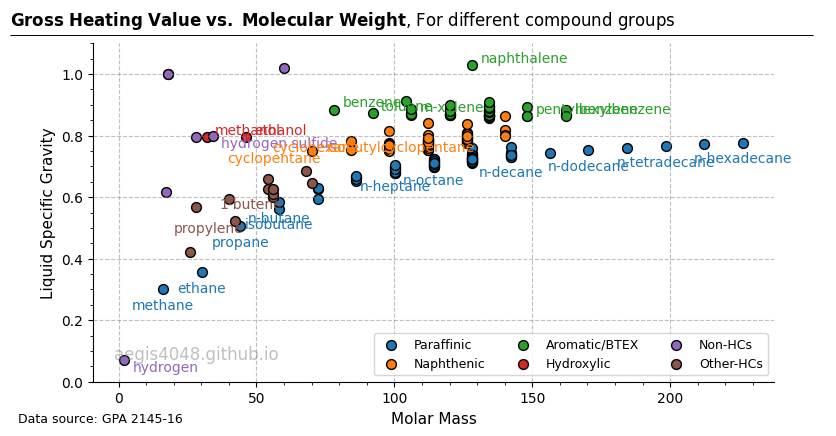

In [27]:
def calc_sg(ghv_liq):
    ghv_liq = ureg('%.15f Btu/lb' % ghv_liq).to('kJ/g')._magnitude
    return np.sqrt((51.9 - ghv_liq) / 8.8)

x2 = np.arange(17000, 25200, 200)
y2 = [calc_sg(ghv_liq) for ghv_liq in x2]

fig, ax = plt.subplots(figsize=(8, 4.5))

#ax.plot(x2, y2)

alpha = 1
_1 = ax.scatter(x.loc[paraffinic_idx], y.loc[paraffinic_idx], s=50, edgecolor='k', alpha=alpha, label='Paraffinic')
_2 = ax.scatter(x.loc[naphethenic_idx], y.loc[naphethenic_idx], s=50, edgecolor='k', alpha=alpha, label='Naphthenic')
_3 = ax.scatter(x.loc[aromatic_idx], y.loc[aromatic_idx], s=50, edgecolor='k', alpha=alpha, label='Aromatic/BTEX')
_4 = ax.scatter(x.loc[hydroxyl_idx], y.loc[hydroxyl_idx], s=50, edgecolor='k', alpha=alpha, label='Hydroxylic')
_5 = ax.scatter(x.loc[non_HC_idx], y.loc[non_HC_idx], s=50, edgecolor='k', alpha=alpha, label='Non-HCs')
_6 = ax.scatter(x.loc[other_idx], y.loc[other_idx], s=50, edgecolor='k', alpha=alpha, label='Other-HCs')

c1 = _1.get_facecolor()[0]
c2 = _2.get_facecolor()[0]
c3 = _3.get_facecolor()[0]
c4 = _4.get_facecolor()[0]
c5 = _5.get_facecolor()[0]
c6 = _6.get_facecolor()[0]

ax.legend(fontsize=9, ncol=3)


labels = ['methane', 'propane', 'n-butane', 'n-heptane', 'n-octane', 'n-decane', 'cyclohexane', 'cyclopentane', 'ethane',
'n-dodecane','n-tetradecane','n-hexadecane', 'methanol', 'ethanol', 'naphthalene', 'isobutylcyclopentane', 'hydrogen',
 'sulfur dioxide', 'hydrogen sulfide', 'toluene', 'benzene', 'm-xylene', 'pentylbenzene', 'hexylbenzene',
         'propylene', '1-butene', 'isobutane'
         ]
df['Display Text'] = df['Compound'].isin(labels)

texts = df['Compound']
for i, txt in enumerate(texts):
    if df['Display Text'].loc[i]:
        c = c5
        ha ='left'
        va = 'top'
        icr_y = 0
        
        if ha == 'left':
            icr_x = 3
        else:
            icr_x = -3

        if df['Is Paraffinic'].loc[i]:
            c = c1
            ha ='center'
            va = 'top'
            icr_y = -0.03
            icr_x = 0
            
        if df['Is Naphthenic'].loc[i]:
            c = c2
            ha ='right'
            va = 'top'
        if df['Is Aromatic'].loc[i]:
            c = c3
            va = 'bottom'
            ha = 'left'
        if df['Is Hydroxyl'].loc[i]:
            c = c4
            va = 'bottom'
            ha = 'left'
        if df['Others'].loc[i]:
            c = c6
            va = 'top'
            ha = 'right'

        ax.annotate(txt, (x.loc[i] + icr_x, y.iloc[i] + icr_y), fontsize=10, c=c, ha=ha, va=va)

ax.minorticks_on()
ax.grid(axis='y', which='major', linestyle='--', color='grey', alpha=0.5)
ax.grid(axis='x', which='major', color='grey', linestyle='--', alpha=0.5)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

#ax.set_xlabel('Gross Heating Value [Btu/lbm]', fontsize=11)
ax.set_ylabel('Liquid Specific Gravity', fontsize=11)
ax.set_xlabel('Molar Mass', fontsize=11)


ax.text(0.03, 0.08, 'aegis4048.github.io', fontsize=12, ha='left', va='center',
    transform=ax.transAxes, color='grey', alpha=0.5)

#ax.set_xlim(17000, 25000)
ax.set_ylim(0, 1.1)

def setbold(txt):
    return ' '.join([r"$\bf{" + item + "}$" for item in txt.split(' ')])

bold_txt = setbold('Gross Heating Value vs. Molecular Weight')
plain_txt = r', For different compound groups'
fig.suptitle(bold_txt + plain_txt, verticalalignment='top', x=0, horizontalalignment='left', fontsize=12, y=0.96)
yloc = 0.88
ax.annotate('', xy=(0.01, yloc + 0.01), xycoords='figure fraction', xytext=(1.02, yloc + 0.01),
            arrowprops=dict(arrowstyle="-", color='k', lw=0.7))

ax.annotate('Data source: GPA 2145-16', xy=(-0.11, -.12), xycoords='axes fraction', fontsize=9)

fig.tight_layout()

In [16]:
df[df['Is Naphthenic'] == True][['Compound', 'Formula', 'Molar Mass [g/mol]', 'Liq. Relative Density @60F:1atm']]

,Compound,Formula,Molar Mass [g/mol],Liq. Relative Density @60F:1atm
34,cyclopentane,C5H10,70.1329,0.75047
37,methylcyclopentane,C6H12,84.1595,0.75368
38,cyclohexane,C6H12,84.1595,0.78362
44,"1,1-dimethylcyclopentane",C7H14,98.1861,0.75922
45,"trans-1,3-dimethylcyclopentane",C7H14,98.1861,0.75350
46,"cis-1,3-dimethylcyclopentane",C7H14,98.1861,0.74952
47,"trans-1,2-dimethylcyclopentane",C7H14,98.1861,0.75608
48,"cis-1,2-dimethylcyclopentane",C7H14,98.1861,0.77729
49,Methylcyclohexane,C7H14,98.1861,0.77403
50,ethylcyclopentane,C7H14,98.1861,0.77102


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import sys
from sklearn.linear_model import LinearRegression
from pint import UnitRegistry

# Initialize a unit registry
ureg = UnitRegistry()

df = pd.read_csv('GPA 2145-16 Compound Properties Table - English - Truncated and PNA Identified.csv')

#x = df['Molar Mass [g/mol]']
#x = df['Ideal Gas Relative Density @60F:1atm']
#x = df['API Gravity @60F:1atm']
#x = df['Gross Heating Value Ideal Gas [Btu/ft^3]']
#x = df['Liq. Relative Density @60F:1atm']
#x = df['API Gravity @60F:1atm']
#x = df['Gross Heating Value Ideal Gas [Btu/lbm]']
x = df['Boiling T. [F]']
#x = df['Net Heating Value Ideal Gas [Btu/ft^3]']

#y = df['Molar Mass [g/mol]']
#y = df['Ideal Gas Relative Density @60F:1atm']
#y = df['API Gravity @60F:1atm']
#y = df['Gross Heating Value Ideal Gas [Btu/ft^3]']
y = df['Liq. Relative Density @60F:1atm']
#y = df['API Gravity @60F:1atm']
#y = df['Gross Heating Value Ideal Gas [Btu/lbm]']
#y = df['Gross Heating Value Ideal Gas [Btu/gal]']
#y = df['Boiling T. [F]']
#y = df['Gross Heating Value Ideal Gas [Btu/ft^3]'] * (379.5 / y)
#y = df['Net Heating Value Ideal Gas [Btu/ft^3]']
#y = df['Boiling T. [F]']

# Labeling for displaying texts
labels = ['methane', 'propane', 'n-butane', 'n-heptane', 'n-octane', 'n-decane', 'cyclohexane', 'cyclopentane', 'ethane',
'n-dodecane','n-tetradecane','n-hexadecane', 'methanol', 'ethanol', 'naphthalene', 'isobutylcyclopentane', 'hydrogen',
 'sulfur dioxide', 'hydrogen sulfide', 'toluene', 'benzene', 'm-xylene', 'pentylbenzene', 'hexylbenzene',
         'propylene', '1-butene', 'isobutane'
         ]
df['Display Text'] = df['Compound'].isin(labels)

BTEX_idx = df[df['Is BTEX'] == True].index
aromatic_idx = df[df['Is Aromatic'] == True].index
non_HC_idx = df[df['Is Hydrocarbon'] == False].index
hydroxyl_idx = df[df['Is Hydroxyl'] == True].index
paraffinic_idx = df[df['Is Paraffinic'] == True].index
naphethenic_idx = df[df['Is Naphthenic'] == True].index
other_idx = df[df['Others'] == True].index
whole_idx = list(df.index)

C:\Users\EricKim\AppData\Local\Temp\ipykernel_9744\2438486011.py:3: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt((51.9 - ghv_liq) / 8.8)


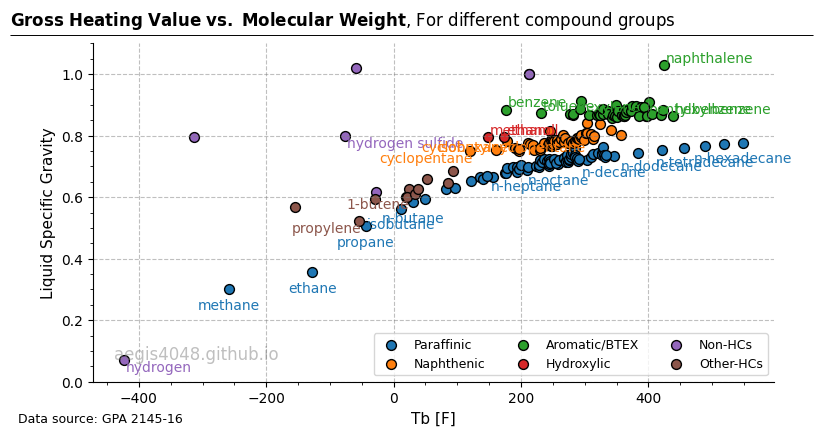

In [5]:
def calc_sg(ghv_liq):
    ghv_liq = ureg('%.15f Btu/lb' % ghv_liq).to('kJ/g')._magnitude
    return np.sqrt((51.9 - ghv_liq) / 8.8)

x2 = np.arange(17000, 25200, 200)
y2 = [calc_sg(ghv_liq) for ghv_liq in x2]

fig, ax = plt.subplots(figsize=(8, 4.5))

#ax.plot(x2, y2)

alpha = 1
_1 = ax.scatter(x.loc[paraffinic_idx], y.loc[paraffinic_idx], s=50, edgecolor='k', alpha=alpha, label='Paraffinic')
_2 = ax.scatter(x.loc[naphethenic_idx], y.loc[naphethenic_idx], s=50, edgecolor='k', alpha=alpha, label='Naphthenic')
_3 = ax.scatter(x.loc[aromatic_idx], y.loc[aromatic_idx], s=50, edgecolor='k', alpha=alpha, label='Aromatic/BTEX')
_4 = ax.scatter(x.loc[hydroxyl_idx], y.loc[hydroxyl_idx], s=50, edgecolor='k', alpha=alpha, label='Hydroxylic')
_5 = ax.scatter(x.loc[non_HC_idx], y.loc[non_HC_idx], s=50, edgecolor='k', alpha=alpha, label='Non-HCs')
_6 = ax.scatter(x.loc[other_idx], y.loc[other_idx], s=50, edgecolor='k', alpha=alpha, label='Other-HCs')

c1 = _1.get_facecolor()[0]
c2 = _2.get_facecolor()[0]
c3 = _3.get_facecolor()[0]
c4 = _4.get_facecolor()[0]
c5 = _5.get_facecolor()[0]
c6 = _6.get_facecolor()[0]

ax.legend(fontsize=9, ncol=3)


labels = ['methane', 'propane', 'n-butane', 'n-heptane', 'n-octane', 'n-decane', 'cyclohexane', 'cyclopentane', 'ethane',
'n-dodecane','n-tetradecane','n-hexadecane', 'methanol', 'ethanol', 'naphthalene', 'isobutylcyclopentane', 'hydrogen',
 'sulfur dioxide', 'hydrogen sulfide', 'toluene', 'benzene', 'm-xylene', 'pentylbenzene', 'hexylbenzene',
         'propylene', '1-butene', 'isobutane'
         ]
df['Display Text'] = df['Compound'].isin(labels)

texts = df['Compound']
for i, txt in enumerate(texts):
    if df['Display Text'].loc[i]:
        c = c5
        ha ='left'
        va = 'top'
        icr_y = 0
        
        if ha == 'left':
            icr_x = 3
        else:
            icr_x = -3

        if df['Is Paraffinic'].loc[i]:
            c = c1
            ha ='center'
            va = 'top'
            icr_y = -0.03
            icr_x = 0
            
        if df['Is Naphthenic'].loc[i]:
            c = c2
            ha ='right'
            va = 'top'
        if df['Is Aromatic'].loc[i]:
            c = c3
            va = 'bottom'
            ha = 'left'
        if df['Is Hydroxyl'].loc[i]:
            c = c4
            va = 'bottom'
            ha = 'left'
        if df['Others'].loc[i]:
            c = c6
            va = 'top'
            ha = 'right'

        ax.annotate(txt, (x.loc[i] + icr_x, y.iloc[i] + icr_y), fontsize=10, c=c, ha=ha, va=va)

ax.minorticks_on()
ax.grid(axis='y', which='major', linestyle='--', color='grey', alpha=0.5)
ax.grid(axis='x', which='major', color='grey', linestyle='--', alpha=0.5)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

#ax.set_xlabel('Gross Heating Value [Btu/lbm]', fontsize=11)
ax.set_ylabel('Liquid Specific Gravity', fontsize=11)
ax.set_xlabel('Molar Mass', fontsize=11)


ax.text(0.03, 0.08, 'aegis4048.github.io', fontsize=12, ha='left', va='center',
    transform=ax.transAxes, color='grey', alpha=0.5)

#ax.set_xlim(17000, 25000)
ax.set_ylim(0, 1.1)

def setbold(txt):
    return ' '.join([r"$\bf{" + item + "}$" for item in txt.split(' ')])

bold_txt = setbold('Gross Heating Value vs. Molecular Weight')
plain_txt = r', For different compound groups'
fig.suptitle(bold_txt + plain_txt, verticalalignment='top', x=0, horizontalalignment='left', fontsize=12, y=0.96)
yloc = 0.88
ax.annotate('', xy=(0.01, yloc + 0.01), xycoords='figure fraction', xytext=(1.02, yloc + 0.01),
            arrowprops=dict(arrowstyle="-", color='k', lw=0.7))

ax.annotate('Data source: GPA 2145-16', xy=(-0.11, -.12), xycoords='axes fraction', fontsize=9)

fig.tight_layout()

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import sys
from sklearn.linear_model import LinearRegression
from pint import UnitRegistry

# Initialize a unit registry
ureg = UnitRegistry()

df = pd.read_csv('GPA 2145-16 Compound Properties Table - English - Truncated and PNA Identified.csv')

#x = df['Molar Mass [g/mol]']
#x = df['Ideal Gas Relative Density @60F:1atm']
#x = df['API Gravity @60F:1atm']
#x = df['Gross Heating Value Ideal Gas [Btu/ft^3]']
#x = df['Liq. Relative Density @60F:1atm']
#x = df['API Gravity @60F:1atm']
#x = df['Gross Heating Value Ideal Gas [Btu/lbm]']
x = df['Boiling T. [F]']
#x = df['Net Heating Value Ideal Gas [Btu/ft^3]']

y = df['Molar Mass [g/mol]']
#y = df['Ideal Gas Relative Density @60F:1atm']
#y = df['API Gravity @60F:1atm']
#y = df['Gross Heating Value Ideal Gas [Btu/ft^3]']
#y = df['Liq. Relative Density @60F:1atm']
#y = df['API Gravity @60F:1atm']
#y = df['Gross Heating Value Ideal Gas [Btu/lbm]']
#y = df['Gross Heating Value Ideal Gas [Btu/gal]']
#y = df['Boiling T. [F]']
#y = df['Gross Heating Value Ideal Gas [Btu/ft^3]'] * (379.5 / y)
#y = df['Net Heating Value Ideal Gas [Btu/ft^3]']
#y = df['Boiling T. [F]']

# Labeling for displaying texts
labels = ['methane', 'propane', 'n-butane', 'n-heptane', 'n-octane', 'n-decane', 'cyclohexane', 'cyclopentane', 'ethane',
'n-dodecane','n-tetradecane','n-hexadecane', 'methanol', 'ethanol', 'naphthalene', 'isobutylcyclopentane', 'hydrogen',
 'sulfur dioxide', 'hydrogen sulfide', 'toluene', 'benzene', 'm-xylene', 'pentylbenzene', 'hexylbenzene',
         'propylene', '1-butene', 'isobutane'
         ]
df['Display Text'] = df['Compound'].isin(labels)

BTEX_idx = df[df['Is BTEX'] == True].index
aromatic_idx = df[df['Is Aromatic'] == True].index
non_HC_idx = df[df['Is Hydrocarbon'] == False].index
hydroxyl_idx = df[df['Is Hydroxyl'] == True].index
paraffinic_idx = df[df['Is Paraffinic'] == True].index
naphethenic_idx = df[df['Is Naphthenic'] == True].index
other_idx = df[df['Others'] == True].index
whole_idx = list(df.index)

C:\Users\EricKim\AppData\Local\Temp\ipykernel_9744\1322608307.py:3: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt((51.9 - ghv_liq) / 8.8)


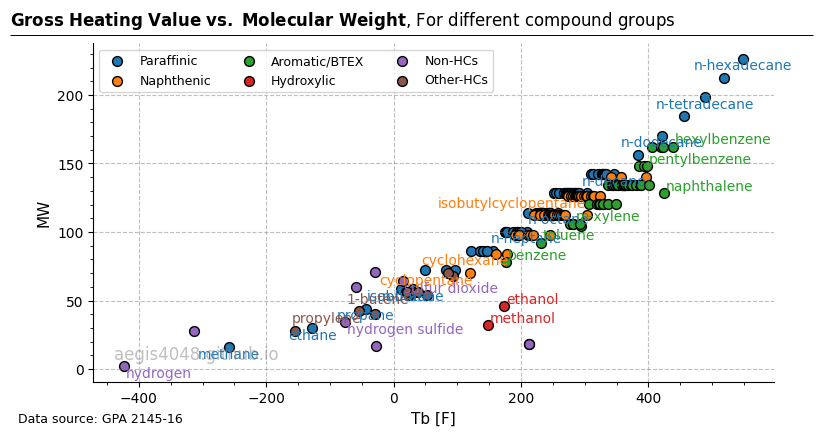

In [8]:
def calc_sg(ghv_liq):
    ghv_liq = ureg('%.15f Btu/lb' % ghv_liq).to('kJ/g')._magnitude
    return np.sqrt((51.9 - ghv_liq) / 8.8)

x2 = np.arange(17000, 25200, 200)
y2 = [calc_sg(ghv_liq) for ghv_liq in x2]

fig, ax = plt.subplots(figsize=(8, 4.5))

#ax.plot(x2, y2)

alpha = 1
_1 = ax.scatter(x.loc[paraffinic_idx], y.loc[paraffinic_idx], s=50, edgecolor='k', alpha=alpha, label='Paraffinic')
_2 = ax.scatter(x.loc[naphethenic_idx], y.loc[naphethenic_idx], s=50, edgecolor='k', alpha=alpha, label='Naphthenic')
_3 = ax.scatter(x.loc[aromatic_idx], y.loc[aromatic_idx], s=50, edgecolor='k', alpha=alpha, label='Aromatic/BTEX')
_4 = ax.scatter(x.loc[hydroxyl_idx], y.loc[hydroxyl_idx], s=50, edgecolor='k', alpha=alpha, label='Hydroxylic')
_5 = ax.scatter(x.loc[non_HC_idx], y.loc[non_HC_idx], s=50, edgecolor='k', alpha=alpha, label='Non-HCs')
_6 = ax.scatter(x.loc[other_idx], y.loc[other_idx], s=50, edgecolor='k', alpha=alpha, label='Other-HCs')

c1 = _1.get_facecolor()[0]
c2 = _2.get_facecolor()[0]
c3 = _3.get_facecolor()[0]
c4 = _4.get_facecolor()[0]
c5 = _5.get_facecolor()[0]
c6 = _6.get_facecolor()[0]

ax.legend(fontsize=9, ncol=3)


labels = ['methane', 'propane', 'n-butane', 'n-heptane', 'n-octane', 'n-decane', 'cyclohexane', 'cyclopentane', 'ethane',
'n-dodecane','n-tetradecane','n-hexadecane', 'methanol', 'ethanol', 'naphthalene', 'isobutylcyclopentane', 'hydrogen',
 'sulfur dioxide', 'hydrogen sulfide', 'toluene', 'benzene', 'm-xylene', 'pentylbenzene', 'hexylbenzene',
         'propylene', '1-butene', 'isobutane'
         ]
df['Display Text'] = df['Compound'].isin(labels)

texts = df['Compound']
for i, txt in enumerate(texts):
    if df['Display Text'].loc[i]:
        c = c5
        ha ='left'
        va = 'top'
        icr_y = 0
        
        if ha == 'left':
            icr_x = 3
        else:
            icr_x = -3

        if df['Is Paraffinic'].loc[i]:
            c = c1
            ha ='center'
            va = 'top'
            icr_y = -0.03
            icr_x = 0
            
        if df['Is Naphthenic'].loc[i]:
            c = c2
            ha ='right'
            va = 'top'
        if df['Is Aromatic'].loc[i]:
            c = c3
            va = 'bottom'
            ha = 'left'
        if df['Is Hydroxyl'].loc[i]:
            c = c4
            va = 'bottom'
            ha = 'left'
        if df['Others'].loc[i]:
            c = c6
            va = 'top'
            ha = 'right'

        ax.annotate(txt, (x.loc[i] + icr_x, y.iloc[i] + icr_y), fontsize=10, c=c, ha=ha, va=va)

ax.minorticks_on()
ax.grid(axis='y', which='major', linestyle='--', color='grey', alpha=0.5)
ax.grid(axis='x', which='major', color='grey', linestyle='--', alpha=0.5)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

#ax.set_xlabel('Gross Heating Value [Btu/lbm]', fontsize=11)
ax.set_ylabel('MW', fontsize=11)
ax.set_xlabel('Tb [F]', fontsize=11)


ax.text(0.03, 0.08, 'aegis4048.github.io', fontsize=12, ha='left', va='center',
    transform=ax.transAxes, color='grey', alpha=0.5)

#ax.set_xlim(17000, 25000)
#ax.set_ylim(0, 1.1)

def setbold(txt):
    return ' '.join([r"$\bf{" + item + "}$" for item in txt.split(' ')])

bold_txt = setbold('Gross Heating Value vs. Molecular Weight')
plain_txt = r', For different compound groups'
fig.suptitle(bold_txt + plain_txt, verticalalignment='top', x=0, horizontalalignment='left', fontsize=12, y=0.96)
yloc = 0.88
ax.annotate('', xy=(0.01, yloc + 0.01), xycoords='figure fraction', xytext=(1.02, yloc + 0.01),
            arrowprops=dict(arrowstyle="-", color='k', lw=0.7))

ax.annotate('Data source: GPA 2145-16', xy=(-0.11, -.12), xycoords='axes fraction', fontsize=9)

fig.tight_layout()